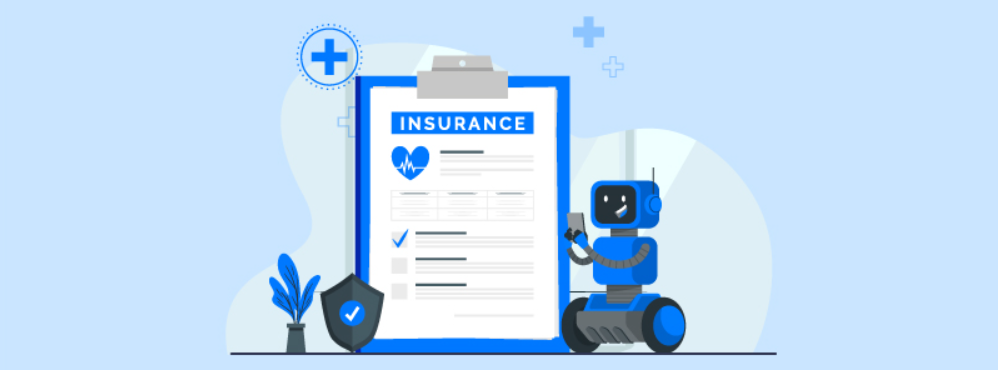

# ***BENEFITS OF USING MACHINE LEARNING IN INSUR-TECH INDUSTRY -***

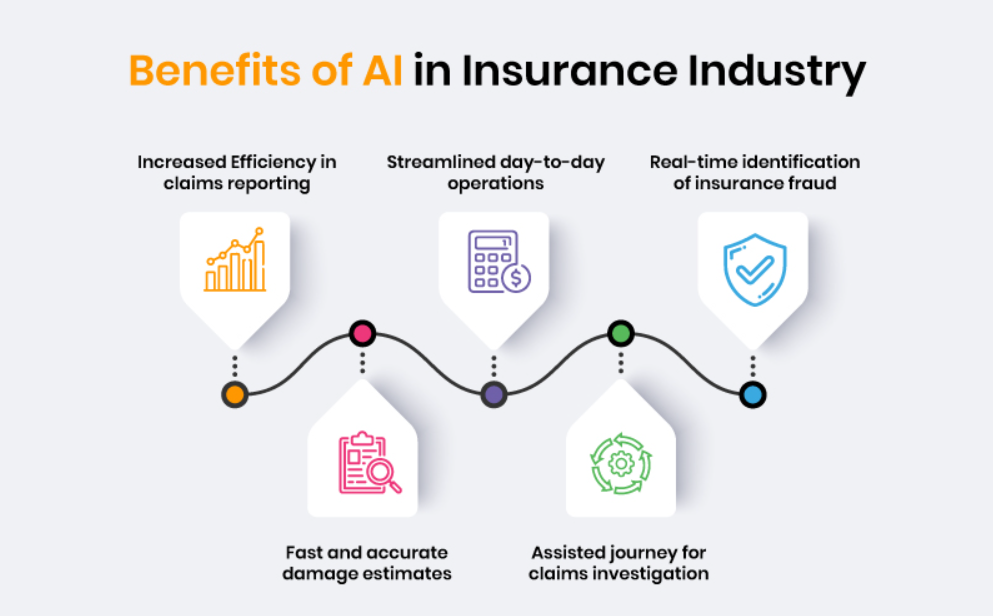

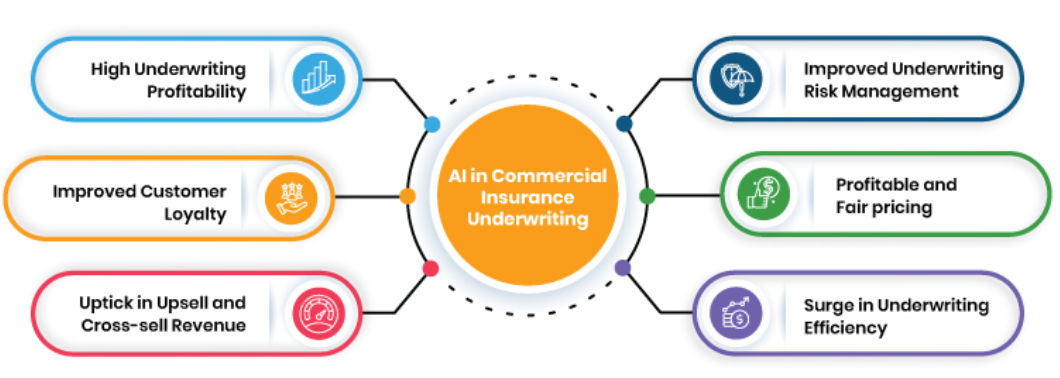

# ***Future Insurance Claim Price Prediction Model and its Main Key Factors-***

An American corporate insurance company has been researching on their project and is planning to provide both current and potential clientele a new insurance program. According to their current client's financial lifestyle and physical condition, the top executive is curious as to whether a certain customer will purchase this new insurance plan or, at the very least, renew the existing plan. If yes, explain the key factors that will determine the cost of this new insurance plan as well as what each client may fairly expect to spend when renewing their current insurance plan in the future.
So, being a Business Insights Analyst, we have two goals to accomplish here – 
1)Identify the Key factors that will influence the purchase of this new Insurance plan.
2)Identify the future amount that each client fairly expect to spend when renewing their current insurance plan.


# ***List of Python Libraries used for this particular project -***

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
from os import chdir
import seaborn as sb
import matplotlib.pyplot as mlp
from numpy import unique
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# ***1)Read the Data-***

In [2]:
import pandas as pd

from os import chdir
chdir("F:/Raw Datasets/Finance/Life Insurance")

data = pd.read_csv("insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# ***2) Rename the Columns -***

In [4]:
data = data.rename(columns={"age":"Age",
                    "sex":"Sex",
                    "bmi":"BMI",
                    "children":"Children",
                    "smoker":"Smoking Habits",
                    "region":"Region",
                    "expenses":"Current_Insurance_Expenses"})

In [5]:
data

,Age,Sex,BMI,Children,Smoking Habits,Region,Current_Insurance_Expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


***3) Data Profiling-***

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1338 non-null   int64  
 1   Sex                         1338 non-null   object 
 2   BMI                         1338 non-null   float64
 3   Children                    1338 non-null   int64  
 4   Smoking Habits              1338 non-null   object 
 5   Region                      1338 non-null   object 
 6   Current_Insurance_Expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,Age,BMI,Children,Current_Insurance_Expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# ***4) Identifying Missing Data in each columns-***

In [8]:
data.isna().sum()

Age                           0
Sex                           0
BMI                           0
Children                      0
Smoking Habits                0
Region                        0
Current_Insurance_Expenses    0
dtype: int64

# ***5) Seperation of data into categorical and numerical data-***

In [9]:
cat = []
con = []

for i in data.columns:
    if(data[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [10]:
cat

['Sex', 'Smoking Habits', 'Region']

In [11]:
con

['Age', 'BMI', 'Children', 'Current_Insurance_Expenses']

# ***6)Exploratory Data Analysis-(Pre-Anomaly/Outliers Elimination)***

**Univariate Analysis -Categorical Parameters**

Text(0.5, 1.0, '(1) Univariate Aanlysis -  Sex')

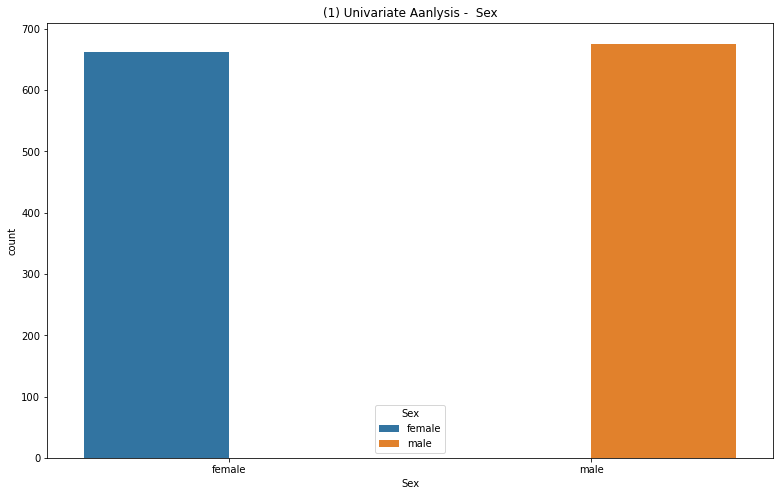

In [12]:
mlp.figure(figsize=(13,8))
sb.countplot(data["Sex"],hue=data["Sex"])
mlp.title("(1) Univariate Aanlysis -  Sex")

Text(0.5, 1.0, '(2) Univariate Aanlysis - Smoking Habits')

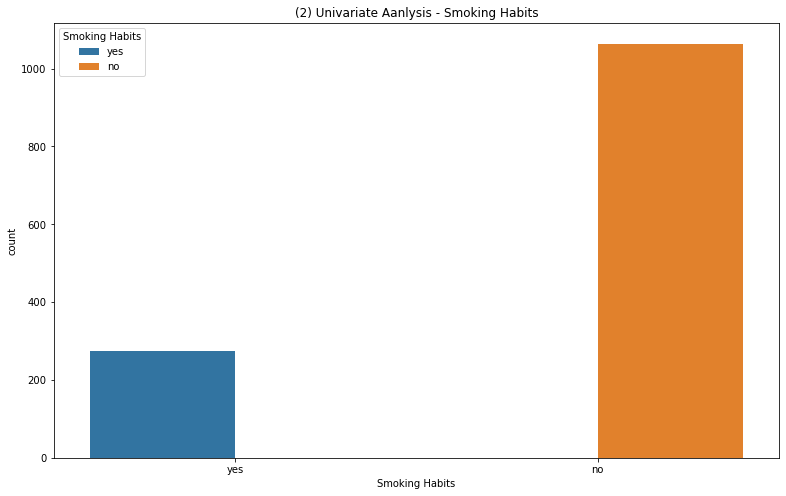

In [13]:
mlp.figure(figsize=(13,8))
sb.countplot(data["Smoking Habits"],hue=data["Smoking Habits"])
mlp.title("(2) Univariate Aanlysis - Smoking Habits")

Text(0.5, 1.0, '(3) Univariate Aanlysis - Region')

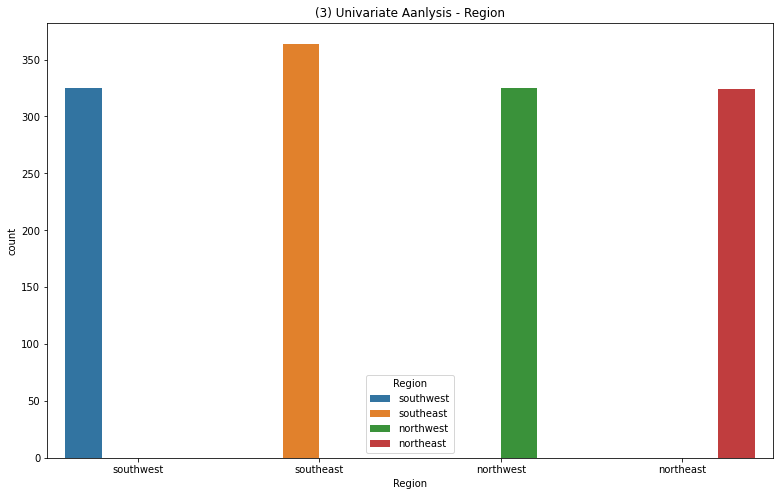

In [14]:
mlp.figure(figsize=(13,8))
sb.countplot(data["Region"],hue=data["Region"])
mlp.title("(3) Univariate Aanlysis - Region")

**Univariate Analysis - Numerical or Continuous Parameters**

Text(0.5, 1.0, '(1) Univariate Aanlysis - Age ----> Skewness - 0.055673')

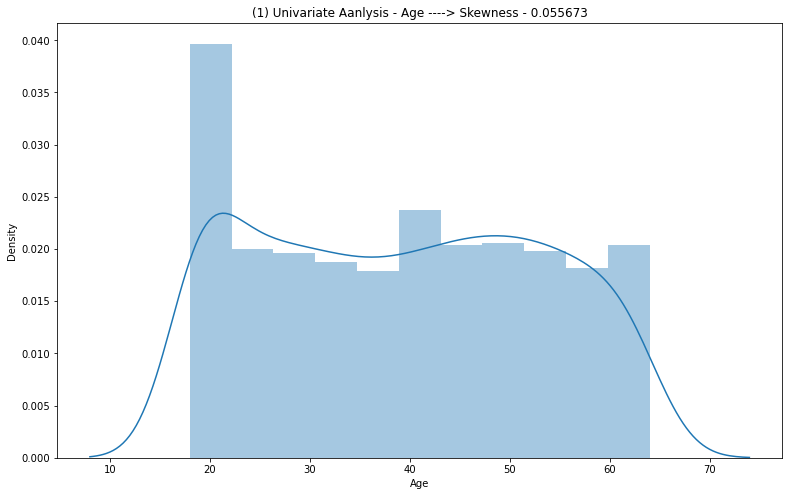

In [15]:
mlp.figure(figsize=(13,8))
sb.distplot(data["Age"])
mlp.title("(1) Univariate Aanlysis - Age ----> Skewness - 0.055673")

Text(0.5, 1.0, '(2) Univariate Aanlysis - BMI ----> Skewness - 0.284593')

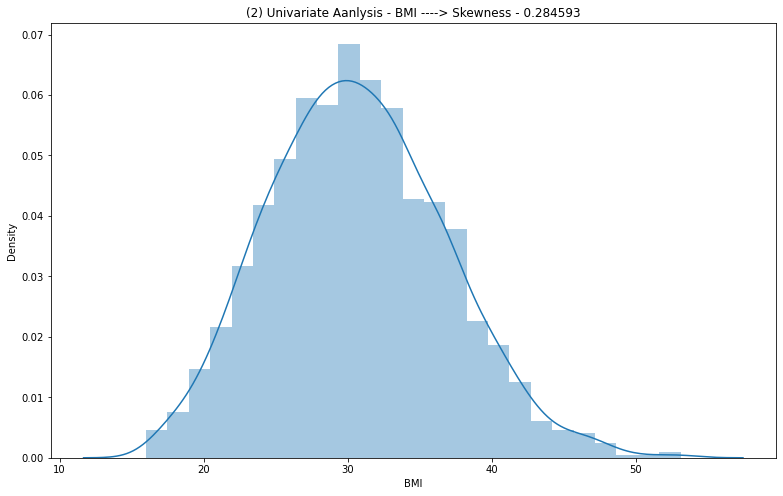

In [16]:
mlp.figure(figsize=(13,8))
sb.distplot(data["BMI"])
mlp.title("(2) Univariate Aanlysis - BMI ----> Skewness - 0.284593")

Text(0.5, 1.0, '(3) Univariate Aanlysis - Children  ----> Skewness - 0.938380')

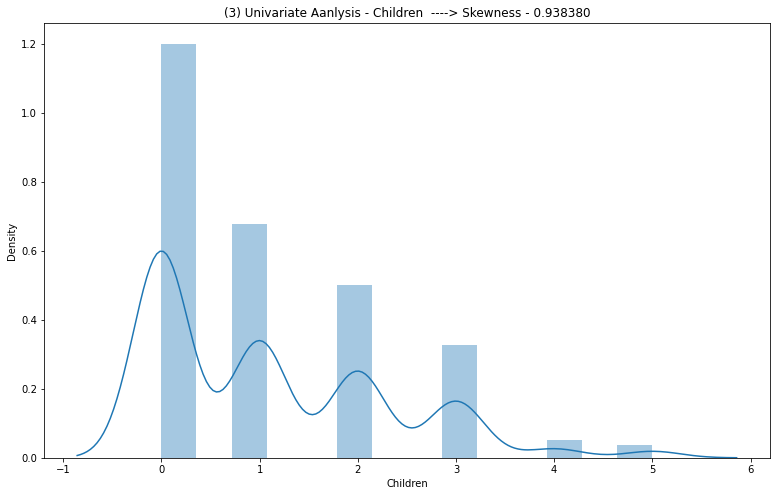

In [17]:
mlp.figure(figsize=(13,8))
sb.distplot(data["Children"])
mlp.title("(3) Univariate Aanlysis - Children  ----> Skewness - 0.938380")

Text(0.5, 1.0, '(4) Univariate Aanlysis - Current_Insurance_Expenses  ----> Skewness - 1.515880')

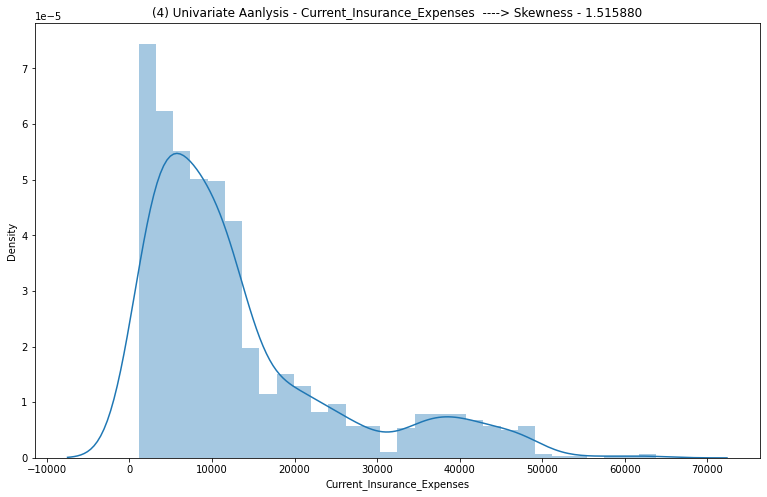

In [18]:
mlp.figure(figsize=(13,8))
sb.distplot(data["Current_Insurance_Expenses"])
mlp.title("(4) Univariate Aanlysis - Current_Insurance_Expenses  ----> Skewness - 1.515880")

In [19]:
data[con].skew()

Age                           0.055673
BMI                           0.284593
Children                      0.938380
Current_Insurance_Expenses    1.515880
dtype: float64

**Bivariate Analysis - Categorical Parameters**

Text(0.5, 1.0, '(1) Bivariate Aanlysis -  Sex vs Current_Insurance_Expenses')

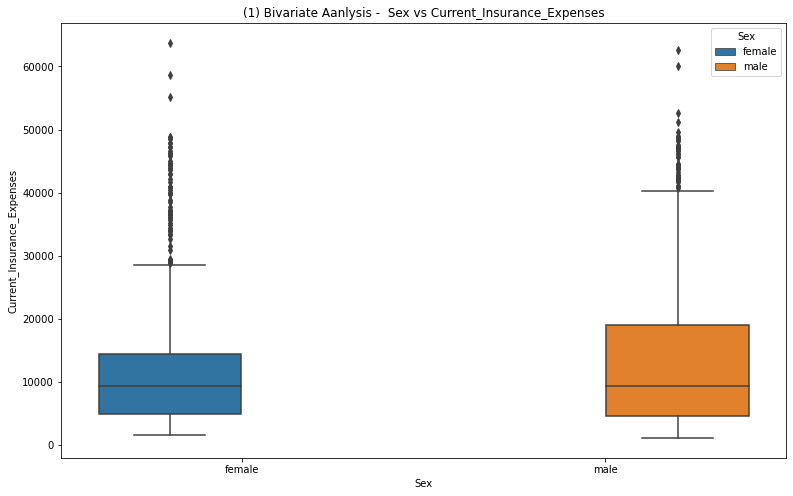

In [20]:
mlp.figure(figsize=(13,8))
sb.boxplot(data["Sex"],data["Current_Insurance_Expenses"],hue=data["Sex"])
mlp.title("(1) Bivariate Aanlysis -  Sex vs Current_Insurance_Expenses")

Text(0.5, 1.0, '(2) Bivariate Aanlysis -  Smoking Habits vs Current_Insurance_Expenses')

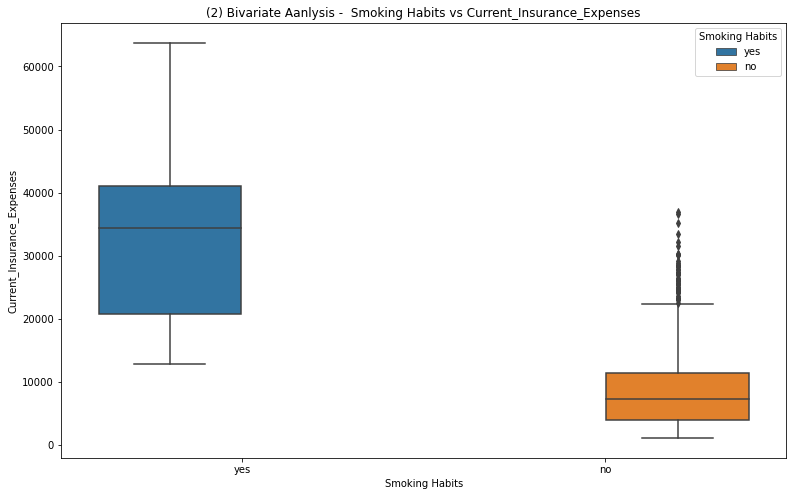

In [21]:
mlp.figure(figsize=(13,8))
sb.boxplot(data["Smoking Habits"],data["Current_Insurance_Expenses"],hue=data["Smoking Habits"])
mlp.title("(2) Bivariate Aanlysis -  Smoking Habits vs Current_Insurance_Expenses")

Text(0.5, 1.0, '(2) Bivariate Aanlysis -  Region vs Current_Insurance_Expenses')

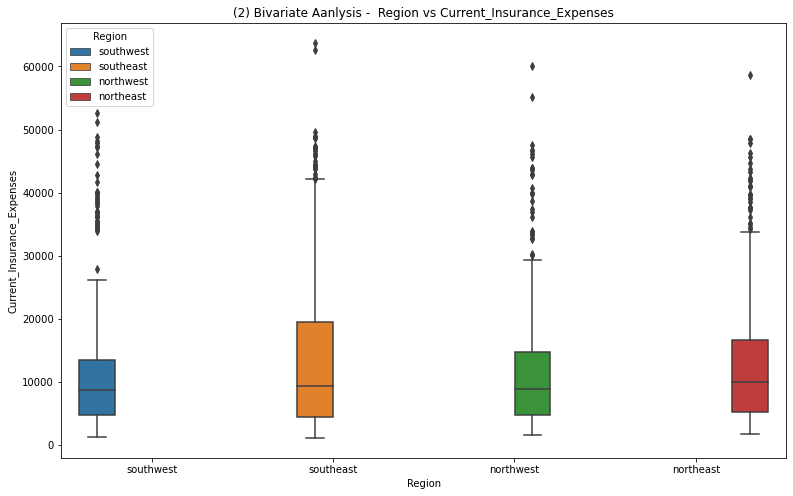

In [22]:
mlp.figure(figsize=(13,8))
sb.boxplot(data["Region"],data["Current_Insurance_Expenses"],hue=data["Region"])
mlp.title("(2) Bivariate Aanlysis -  Region vs Current_Insurance_Expenses")

**Bivariate Analysis - Continuous or Numerical Parameters**

Text(0.5, 1.0, '(1) Bivariate Aanlysis -  Age vs Current_Insurance_Expenses')

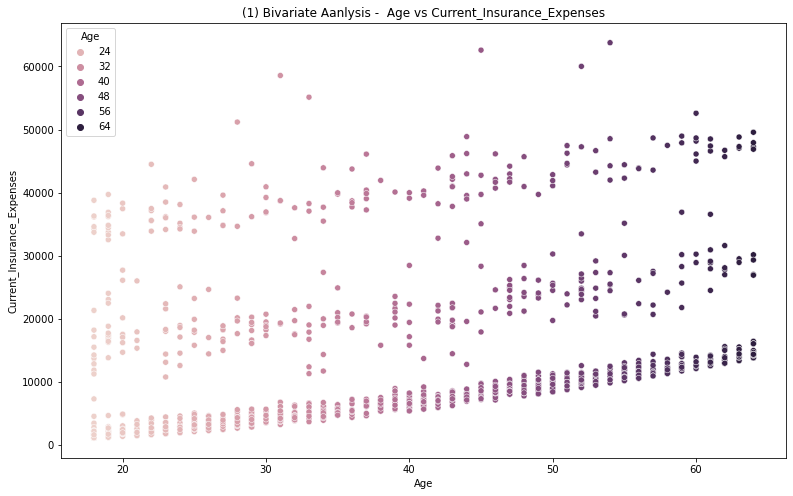

In [23]:
mlp.figure(figsize=(13,8))
sb.scatterplot(data["Age"],data["Current_Insurance_Expenses"],hue=data["Age"])
mlp.title("(1) Bivariate Aanlysis -  Age vs Current_Insurance_Expenses")

Text(0.5, 1.0, '(2) Bivariate Aanlysis -  BMI vs Current_Insurance_Expenses')

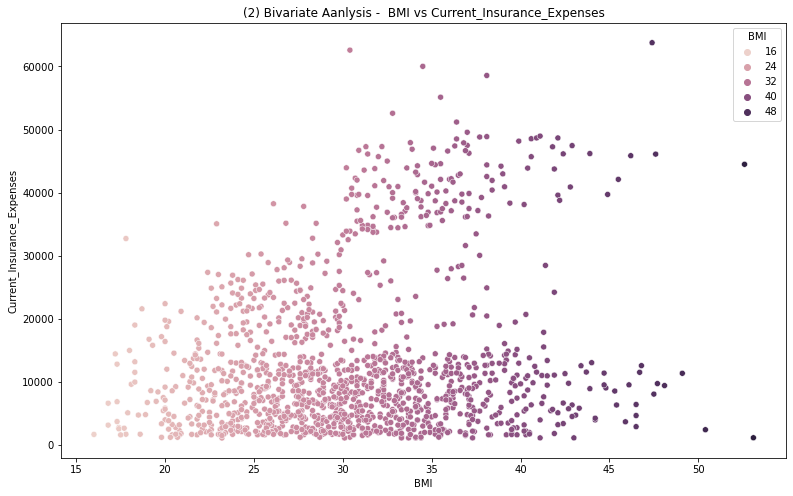

In [24]:
mlp.figure(figsize=(13,8))
sb.scatterplot(data["BMI"],data["Current_Insurance_Expenses"],hue=data["BMI"])
mlp.title("(2) Bivariate Aanlysis -  BMI vs Current_Insurance_Expenses")

Text(0.5, 1.0, '(3) Bivariate Aanlysis -  Children vs Current_Insurance_Expenses')

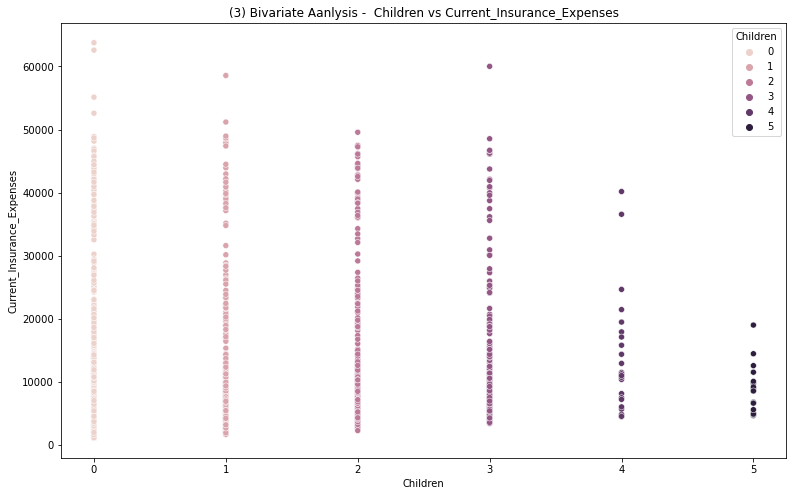

In [25]:
mlp.figure(figsize=(13,8))
sb.scatterplot(data["Children"],data["Current_Insurance_Expenses"],hue=data["Children"])
mlp.title("(3) Bivariate Aanlysis -  Children vs Current_Insurance_Expenses")

# ***7) Identifying Outliers and Eliminating them if any-***

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler ()
std_data = pd.DataFrame(ss.fit_transform(data[con]),columns=con)

In [27]:
std_data

,Age,BMI,Children,Current_Insurance_Expenses
0,-1.438764,-0.453646,-0.908614,0.298583
1,-1.509965,0.514186,-0.078767,-0.953689
2,-0.797954,0.382954,1.580926,-0.728675
3,-0.441948,-1.306650,-0.908614,0.719843
4,-0.513149,-0.289606,-0.908614,-0.776802
...,...,...,...,...
1333,0.768473,0.054876,1.580926,-0.220551
1334,-1.509965,0.202511,-0.908614,-0.914002
1335,-1.509965,1.022707,-0.908614,-0.961597
1336,-1.296362,-0.798128,-0.908614,-0.930361


In [28]:
rows_tobe_dropped = []

for i in con:
    out = list(std_data[(std_data[i]>3)|(std_data[i]<-3)].index)
    rows_tobe_dropped.extend(out)

In [29]:
from numpy import unique
Outliers = unique(rows_tobe_dropped)

In [30]:
Outliers

array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317])

In [31]:
len(Outliers)

29

In [32]:
data = data.drop(index=Outliers,axis=0)

In [33]:
data.shape

(1309, 7)

In [34]:
data.index = range(0,1309,1)

In [35]:
data

,Age,Sex,BMI,Children,Smoking Habits,Region,Current_Insurance_Expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1304,50,male,31.0,3,no,northwest,10600.55
1305,18,female,31.9,0,no,northeast,2205.98
1306,18,female,36.9,0,no,southeast,1629.83
1307,21,female,25.8,0,no,southwest,2007.95


# ***8)Exploratory Data Analysis-(Post-Outliers Elimination)***

**Univariate Analysis -Categorical Parameters**

Text(0.5, 1.0, '(1) Univariate Aanlysis -  Sex')

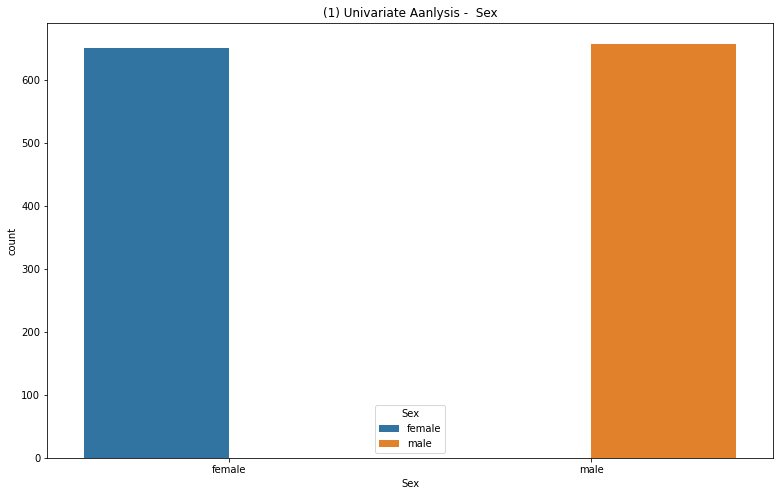

In [36]:
mlp.figure(figsize=(13,8))
sb.countplot(data["Sex"],hue=data["Sex"])
mlp.title("(1) Univariate Aanlysis -  Sex")

Text(0.5, 1.0, '(2) Univariate Aanlysis - Smoking Habits')

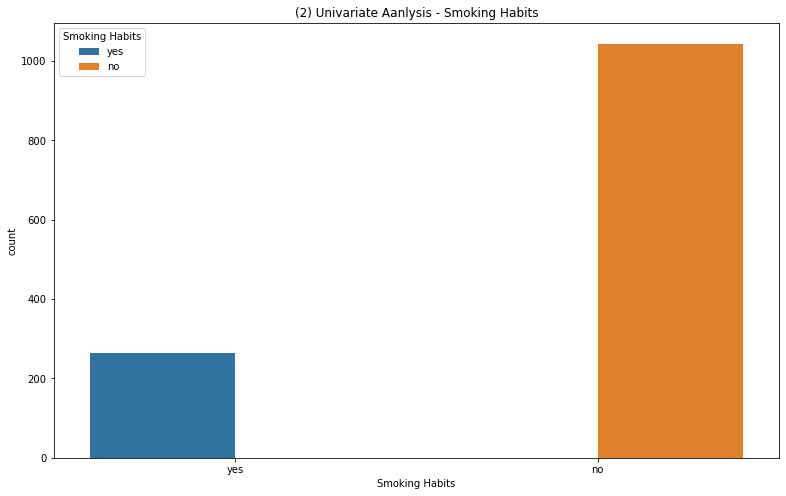

In [37]:
mlp.figure(figsize=(13,8))
sb.countplot(data["Smoking Habits"],hue=data["Smoking Habits"])
mlp.title("(2) Univariate Aanlysis - Smoking Habits")

Text(0.5, 1.0, '(3) Univariate Aanlysis - Region')

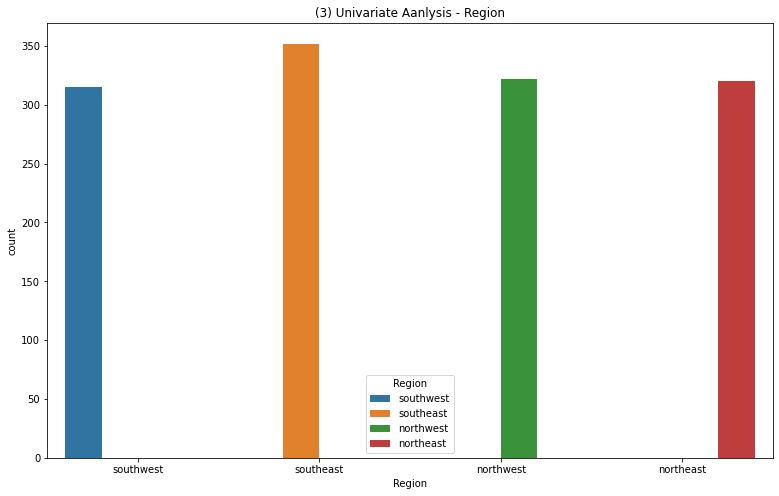

In [38]:
mlp.figure(figsize=(13,8))
sb.countplot(data["Region"],hue=data["Region"])
mlp.title("(3) Univariate Aanlysis - Region")

**Univariate Analysis - Numerical or Continuous Parameters**

Text(0.5, 1.0, '(1) Univariate Aanlysis - Age ----> Skewness - 0.051340')

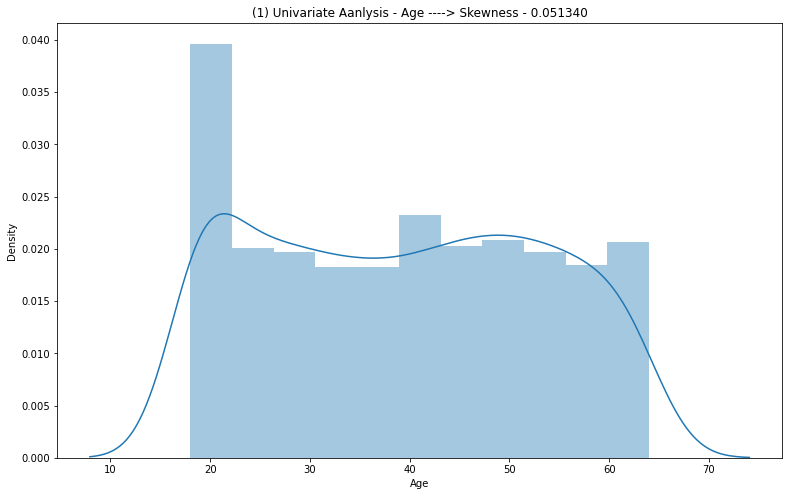

In [39]:
mlp.figure(figsize=(13,8))
sb.distplot(data["Age"])
mlp.title("(1) Univariate Aanlysis - Age ----> Skewness - 0.051340")

Text(0.5, 1.0, '(2) Univariate Aanlysis - BMI ----> Skewness - 0.191822')

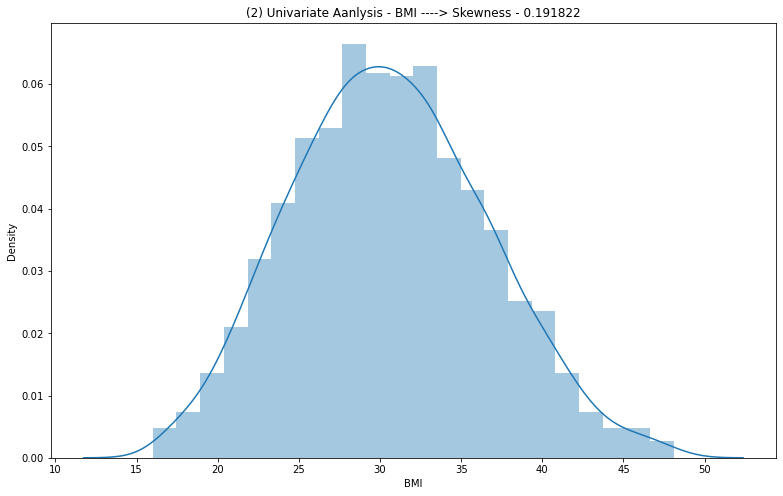

In [40]:
mlp.figure(figsize=(13,8))
sb.distplot(data["BMI"])
mlp.title("(2) Univariate Aanlysis - BMI ----> Skewness - 0.191822")

Text(0.5, 1.0, '(3) Univariate Aanlysis - Children  ----> Skewness - 0.738119')

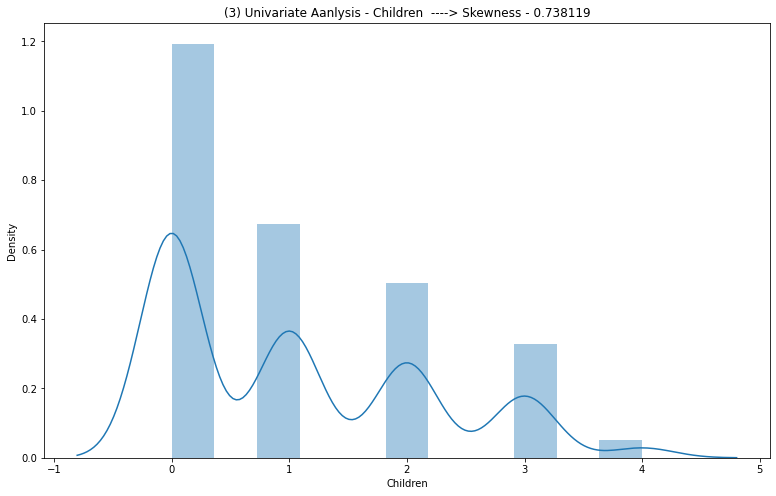

In [41]:
mlp.figure(figsize=(13,8))
sb.distplot(data["Children"])
mlp.title("(3) Univariate Aanlysis - Children  ----> Skewness - 0.738119")

Text(0.5, 1.0, '(4) Univariate Aanlysis - Current_Insurance_Expenses  ----> Skewness - 1.437160')

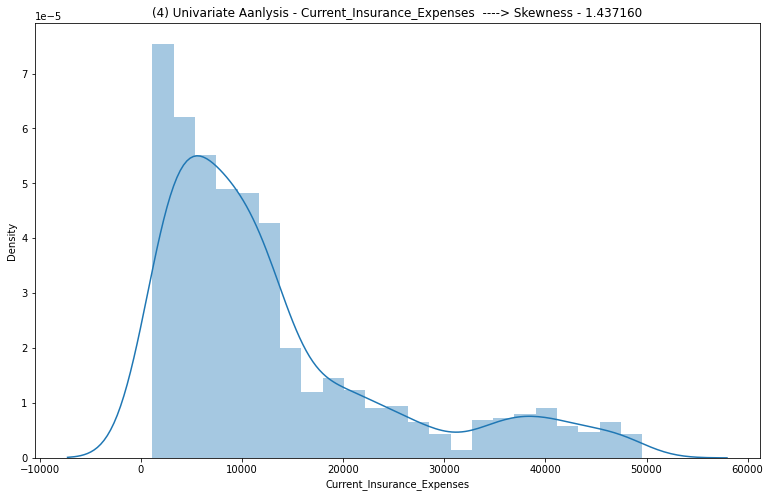

In [42]:
mlp.figure(figsize=(13,8))
sb.distplot(data["Current_Insurance_Expenses"])
mlp.title("(4) Univariate Aanlysis - Current_Insurance_Expenses  ----> Skewness - 1.437160")

In [43]:
data[con].skew()

Age                           0.051340
BMI                           0.191822
Children                      0.738119
Current_Insurance_Expenses    1.437160
dtype: float64

**Bivariate Analysis - Categorical Parameters**

Text(0.5, 1.0, '(1) Bivariate Aanlysis -  Sex vs Current_Insurance_Expenses')

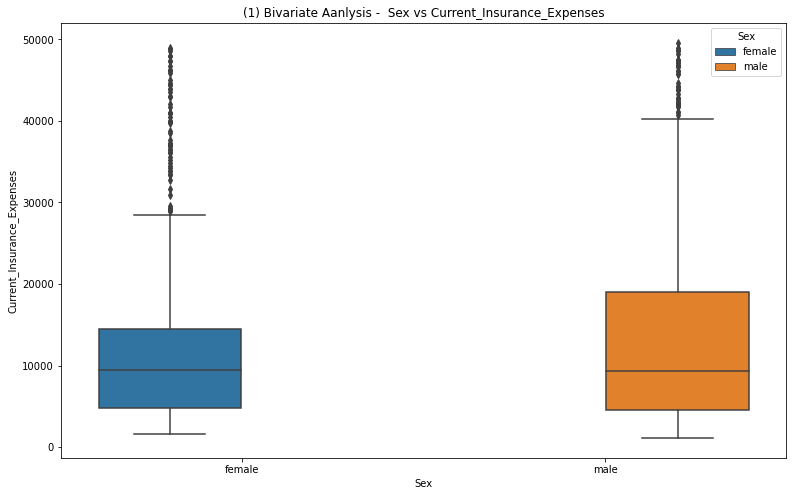

In [44]:
mlp.figure(figsize=(13,8))
sb.boxplot(data["Sex"],data["Current_Insurance_Expenses"],hue=data["Sex"])
mlp.title("(1) Bivariate Aanlysis -  Sex vs Current_Insurance_Expenses")

Text(0.5, 1.0, '(2) Bivariate Aanlysis -  Smoking Habits vs Current_Insurance_Expenses')

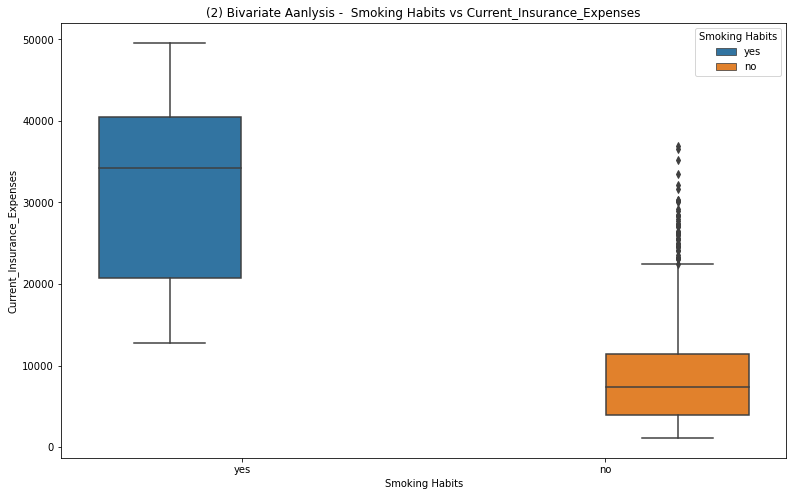

In [45]:
mlp.figure(figsize=(13,8))
sb.boxplot(data["Smoking Habits"],data["Current_Insurance_Expenses"],hue=data["Smoking Habits"])
mlp.title("(2) Bivariate Aanlysis -  Smoking Habits vs Current_Insurance_Expenses")

Text(0.5, 1.0, '(2) Bivariate Aanlysis -  Region vs Current_Insurance_Expenses')

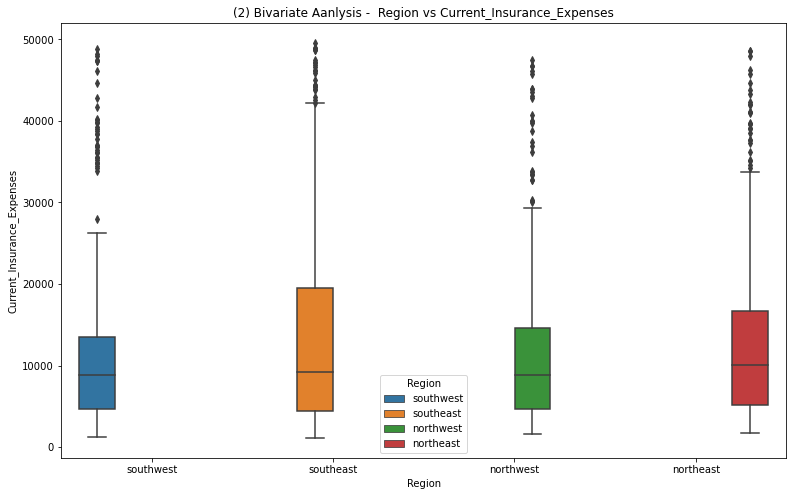

In [46]:
mlp.figure(figsize=(13,8))
sb.boxplot(data["Region"],data["Current_Insurance_Expenses"],hue=data["Region"])
mlp.title("(2) Bivariate Aanlysis -  Region vs Current_Insurance_Expenses")

**Bivariate Analysis - Continuous or Numerical Parameters**

Text(0.5, 1.0, '(1) Bivariate Aanlysis -  Age vs Current_Insurance_Expenses')

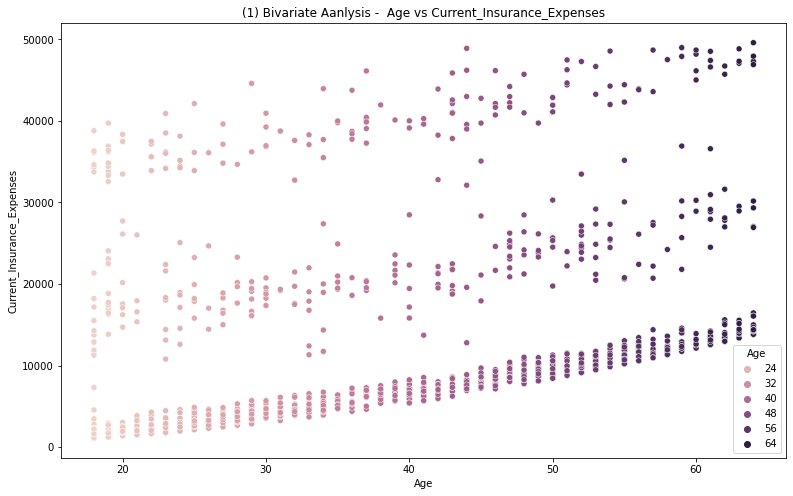

In [47]:
mlp.figure(figsize=(13,8))
sb.scatterplot(data["Age"],data["Current_Insurance_Expenses"],hue=data["Age"])
mlp.title("(1) Bivariate Aanlysis -  Age vs Current_Insurance_Expenses")

Text(0.5, 1.0, '(2) Bivariate Aanlysis -  BMI vs Current_Insurance_Expenses')

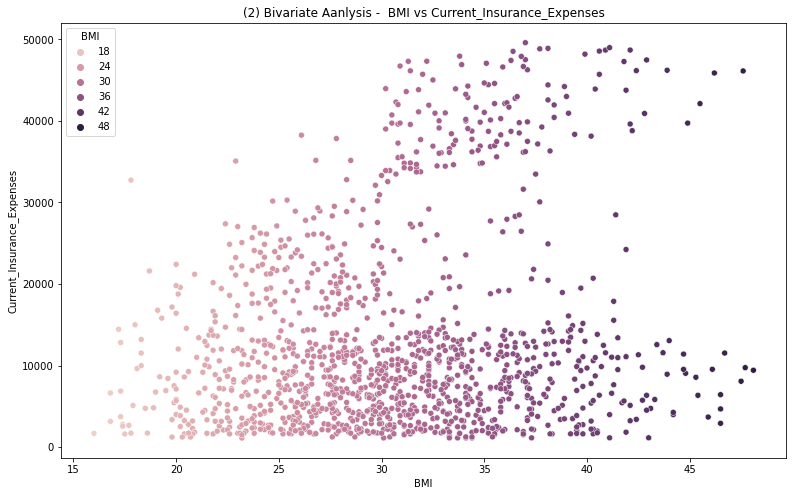

In [48]:
mlp.figure(figsize=(13,8))
sb.scatterplot(data["BMI"],data["Current_Insurance_Expenses"],hue=data["BMI"])
mlp.title("(2) Bivariate Aanlysis -  BMI vs Current_Insurance_Expenses")

Text(0.5, 1.0, '(3) Bivariate Aanlysis -  Children vs Current_Insurance_Expenses')

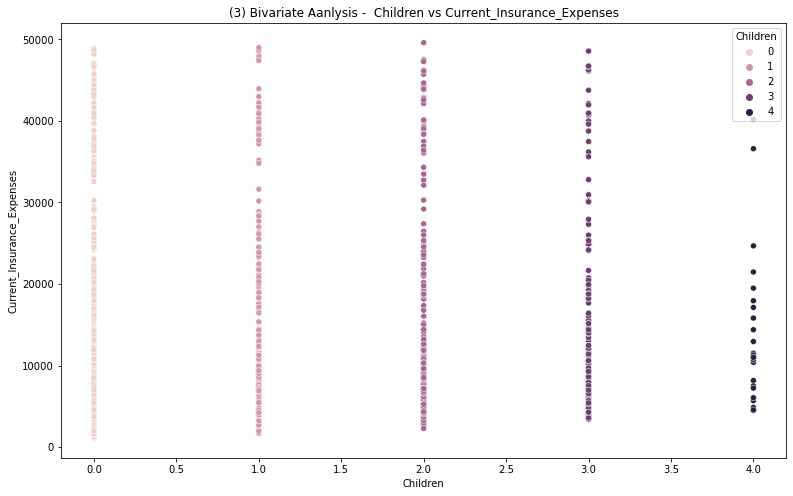

In [49]:
mlp.figure(figsize=(13,8))
sb.scatterplot(data["Children"],data["Current_Insurance_Expenses"],hue=data["Children"])
mlp.title("(3) Bivariate Aanlysis -  Children vs Current_Insurance_Expenses")

# ***9)Understanding the Correlation-***

In [50]:
data.corr()[["Current_Insurance_Expenses"]].sort_values(by="Current_Insurance_Expenses",ascending=False)

,Current_Insurance_Expenses
Current_Insurance_Expenses,1.000000
Age,0.305263
BMI,0.191691
Children,0.100438


Text(0.5, 1.0, 'Correlation Data Analysis Between Individual Parameters')

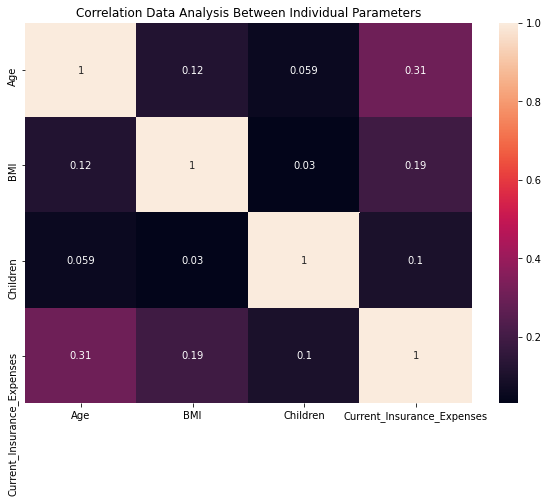

In [51]:
mlp.figure(figsize=(10,7))
sb.heatmap(data.corr(),annot=True)
mlp.title("Correlation Data Analysis Between Individual Parameters")

# ***10) Preprocessing of entire Dataset for futher model predictions-***

In [52]:
Y = data[["Current_Insurance_Expenses"]]
X = data.drop(columns="Current_Insurance_Expenses",axis=1)

In [53]:
Y

,Current_Insurance_Expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1304,10600.55
1305,2205.98
1306,1629.83
1307,2007.95


In [54]:
X

,Age,Sex,BMI,Children,Smoking Habits,Region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1304,50,male,31.0,3,no,northwest
1305,18,female,31.9,0,no,northeast
1306,18,female,36.9,0,no,southeast
1307,21,female,25.8,0,no,southwest


In [55]:
xcat = []
xcon = []

for i in X.columns:
    if(X[i].dtypes == "object"):
        xcat.append(i)
    else:
        xcon.append(i)

In [56]:
xcat

['Sex', 'Smoking Habits', 'Region']

In [57]:
xcon

['Age', 'BMI', 'Children']

# ***11) Feature Engineering-***

*Standardization of continuous columns-*

In [58]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler ()
data_X1std = pd.DataFrame(ss.fit_transform(X[xcon]),columns=xcon)

In [59]:
data_X1std

,Age,BMI,Children
0,-1.439063,-0.449713,-0.929616
1,-1.510086,0.538052,-0.040093
2,-0.799859,0.404118,1.738954
3,-0.444746,-1.320285,-0.929616
4,-0.515769,-0.282295,-0.929616
...,...,...,...
1304,0.762639,0.069282,1.738954
1305,-1.510086,0.219958,-0.929616
1306,-1.510086,1.057047,-0.929616
1307,-1.297018,-0.801290,-0.929616


*One hot encoding of Categorical columns-*

In [60]:
data_X2std = pd.get_dummies(X[xcat])

In [61]:
data_X2std

,Sex_female,Sex_male,Smoking Habits_no,Smoking Habits_yes,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1304,0,1,1,0,0,1,0,0
1305,1,0,1,0,1,0,0,0
1306,1,0,1,0,0,0,1,0
1307,1,0,1,0,0,0,0,1


In [62]:
data_XAstd = data_X1std.join(data_X2std)

In [63]:
data_XAstd

,Age,BMI,Children,Sex_female,Sex_male,Smoking Habits_no,Smoking Habits_yes,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,-1.439063,-0.449713,-0.929616,1,0,0,1,0,0,0,1
1,-1.510086,0.538052,-0.040093,0,1,1,0,0,0,1,0
2,-0.799859,0.404118,1.738954,0,1,1,0,0,0,1,0
3,-0.444746,-1.320285,-0.929616,0,1,1,0,0,1,0,0
4,-0.515769,-0.282295,-0.929616,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.762639,0.069282,1.738954,0,1,1,0,0,1,0,0
1305,-1.510086,0.219958,-0.929616,1,0,1,0,1,0,0,0
1306,-1.510086,1.057047,-0.929616,1,0,1,0,0,0,1,0
1307,-1.297018,-0.801290,-0.929616,1,0,1,0,0,0,0,1


# ***12)Divide data in training & testing set-***

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data_XAstd,Y,test_size=0.2,random_state=21)

In [65]:
print(xtrain.shape)
print(ytest.shape)
print(ytrain.shape)
print(ytest.shape)

(1047, 11)
(262, 1)
(1047, 1)
(262, 1)


# ***Model Predictions***

# ***13)Feature Selection Linear Regression Models-***

MODEL 1 [Linear Regression] -----------> Current_Insurance_Expenses as Predicted Value(Y) and Predictors as ['Age']
Training Mean Absolute Error ------> 8629.329
Testing Mean Absolute Error ------> 9290.548
Training Mean Squared Error ------> 121300753.747
Testing Mean Squared Error ------> 139390372.096
Model Status -----> OVERFIT i.e. Testing Error > Training Error - Less Bias More Variance


<AxesSubplot:xlabel='Age', ylabel='Current_Insurance_Expenses'>

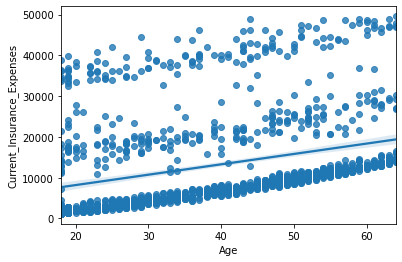

In [66]:
Y = data[["Current_Insurance_Expenses"]]
X = data[["Age"]]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
model = lr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_abs_err = mean_absolute_error(ytrain,tr_pred)
ts_abs_err = mean_absolute_error(ytest,ts_pred)

from sklearn.metrics import mean_squared_error
tr_sqr_err = mean_squared_error(ytrain,tr_pred)
ts_sqr_err = mean_squared_error(ytest,ts_pred)

print("MODEL 1 [Linear Regression] -----------> Current_Insurance_Expenses as Predicted Value(Y) and Predictors as",list(X.columns))
print("Training Mean Absolute Error ------>",round(tr_abs_err,3))
print("Testing Mean Absolute Error ------>",round(ts_abs_err,3))
print("Training Mean Squared Error ------>",round(tr_sqr_err,3))
print("Testing Mean Squared Error ------>",round(ts_sqr_err,3))
print("Model Status -----> OVERFIT i.e. Testing Error > Training Error - Less Bias More Variance")
sb.regplot(data["Age"],data["Current_Insurance_Expenses"])

MODEL 2 [Linear Regression] -----------> Current_Insurance_Expenses as Predicted Value(Y) and Predictors as ['Age', 'BMI']
Training Mean Absolute Error ------> 8581.857
Testing Mean Absolute Error ------> 9404.921
Training Mean Squared Error ------> 117366302.586
Testing Mean Squared Error ------> 138214199.119
Model Status -----> OVERFIT i.e. Testing Error > Training Error - Less Bias More Variance


<AxesSubplot:xlabel='BMI', ylabel='Current_Insurance_Expenses'>

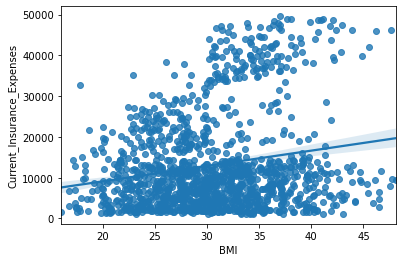

In [67]:
Y = data[["Current_Insurance_Expenses"]]
X = data[["Age","BMI"]]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler ()
data_X1std = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data_X1std,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
model = lr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_abs_err = mean_absolute_error(ytrain,tr_pred)
ts_abs_err = mean_absolute_error(ytest,ts_pred)

from sklearn.metrics import mean_squared_error
tr_sqr_err = mean_squared_error(ytrain,tr_pred)
ts_sqr_err = mean_squared_error(ytest,ts_pred)

print("MODEL 2 [Linear Regression] -----------> Current_Insurance_Expenses as Predicted Value(Y) and Predictors as",list(X.columns))
print("Training Mean Absolute Error ------>",round(tr_abs_err,3))
print("Testing Mean Absolute Error ------>",round(ts_abs_err,3))
print("Training Mean Squared Error ------>",round(tr_sqr_err,3))
print("Testing Mean Squared Error ------>",round(ts_sqr_err,3))
print("Model Status -----> OVERFIT i.e. Testing Error > Training Error - Less Bias More Variance")
sb.regplot(data["BMI"],data["Current_Insurance_Expenses"])

MODEL 3 [Linear Regression] -----------> Current_Insurance_Expenses as Predicted Value(Y) and Predictors as ['Age', 'BMI', 'Children']
Training Mean Absolute Error ------> 8550.887
Testing Mean Absolute Error ------> 9305.514
Training Mean Squared Error ------> 116665391.238
Testing Mean Squared Error ------> 136757895.51
Model Status -----> OVERFIT i.e. Testing Error > Training Error - Less Bias More Variance


<AxesSubplot:xlabel='Children', ylabel='Current_Insurance_Expenses'>

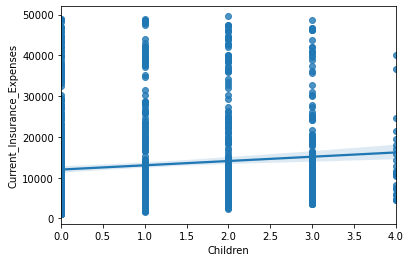

In [68]:
Y = data[["Current_Insurance_Expenses"]]
X = data[["Age","BMI","Children"]]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler ()
data_X1std = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data_X1std,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
model = lr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_abs_err = mean_absolute_error(ytrain,tr_pred)
ts_abs_err = mean_absolute_error(ytest,ts_pred)

from sklearn.metrics import mean_squared_error
tr_sqr_err = mean_squared_error(ytrain,tr_pred)
ts_sqr_err = mean_squared_error(ytest,ts_pred)

print("MODEL 3 [Linear Regression] -----------> Current_Insurance_Expenses as Predicted Value(Y) and Predictors as",list(X.columns))
print("Training Mean Absolute Error ------>",round(tr_abs_err,3))
print("Testing Mean Absolute Error ------>",round(ts_abs_err,3))
print("Training Mean Squared Error ------>",round(tr_sqr_err,3))
print("Testing Mean Squared Error ------>",round(ts_sqr_err,3))
print("Model Status -----> OVERFIT i.e. Testing Error > Training Error - Less Bias More Variance")
sb.regplot(data["Children"],data["Current_Insurance_Expenses"])

MODEL 4 [Linear Regression] -----------> Current_Insurance_Expenses as Predicted Value(Y) and Predictors as ['Age', 'BMI', 'Children', 'Sex']
Training Mean Absolute Error ------> 8512.335
Testing Mean Absolute Error ------> 9250.446
Training Mean Squared Error ------> 116084399.76
Testing Mean Squared Error ------> 136895935.843
Model Status -----> OVERFIT i.e. Testing Error > Training Error - Less Bias More Variance


<AxesSubplot:xlabel='Sex', ylabel='Current_Insurance_Expenses'>

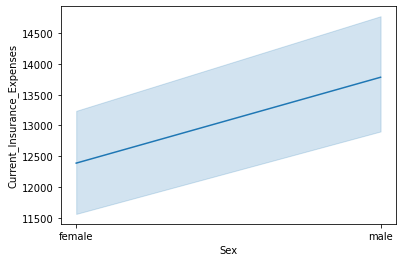

In [69]:
Y = data[["Current_Insurance_Expenses"]]
X = data[["Age","BMI","Children","Sex"]]

xcat = []
xcon = []

for i in X.columns:
    if(X[i].dtypes == "object"):
        xcat.append(i)
    else:
        xcon.append(i)
        
from sklearn.preprocessing import StandardScaler
ss = StandardScaler ()
data_X1std = pd.DataFrame(ss.fit_transform(X[xcon]),columns=xcon)
data_X2std = pd.get_dummies(X[xcat])
data_XAstd = data_X1std.join(data_X2std)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data_XAstd,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
model = lr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_abs_err = mean_absolute_error(ytrain,tr_pred)
ts_abs_err = mean_absolute_error(ytest,ts_pred)

from sklearn.metrics import mean_squared_error
tr_sqr_err = mean_squared_error(ytrain,tr_pred)
ts_sqr_err = mean_squared_error(ytest,ts_pred)

print("MODEL 4 [Linear Regression] -----------> Current_Insurance_Expenses as Predicted Value(Y) and Predictors as",list(X.columns))
print("Training Mean Absolute Error ------>",round(tr_abs_err,3))
print("Testing Mean Absolute Error ------>",round(ts_abs_err,3))
print("Training Mean Squared Error ------>",round(tr_sqr_err,3))
print("Testing Mean Squared Error ------>",round(ts_sqr_err,3))
print("Model Status -----> OVERFIT i.e. Testing Error > Training Error - Less Bias More Variance")
sb.lineplot(data["Sex"],data["Current_Insurance_Expenses"])

MODEL 5 [Linear Regression] -----------> Current_Insurance_Expenses as Predicted Value(Y) and Predictors as ['Age', 'BMI', 'Children', 'Sex', 'Smoking Habits']
Training Mean Absolute Error ------> 4021.102
Testing Mean Absolute Error ------> 4370.036
Training Mean Squared Error ------> 33058561.958
Testing Mean Squared Error ------> 38443912.636
Model Status -----> OVERFIT i.e. Testing Error > Training Error - Less Bias More Variance


<AxesSubplot:xlabel='Smoking Habits', ylabel='Current_Insurance_Expenses'>

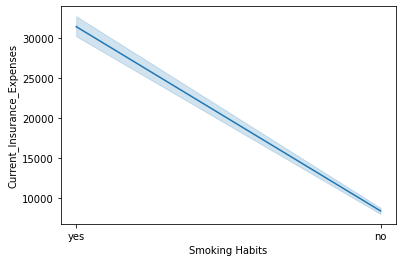

In [70]:
Y = data[["Current_Insurance_Expenses"]]
X = data[["Age","BMI","Children","Sex","Smoking Habits"]]

xcat = []
xcon = []

for i in X.columns:
    if(X[i].dtypes == "object"):
        xcat.append(i)
    else:
        xcon.append(i)
        
from sklearn.preprocessing import StandardScaler
ss = StandardScaler ()
data_X1std = pd.DataFrame(ss.fit_transform(X[xcon]),columns=xcon)
data_X2std = pd.get_dummies(X[xcat])
data_XAstd = data_X1std.join(data_X2std)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data_XAstd,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
model = lr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_abs_err = mean_absolute_error(ytrain,tr_pred)
ts_abs_err = mean_absolute_error(ytest,ts_pred)

from sklearn.metrics import mean_squared_error
tr_sqr_err = mean_squared_error(ytrain,tr_pred)
ts_sqr_err = mean_squared_error(ytest,ts_pred)

print("MODEL 5 [Linear Regression] -----------> Current_Insurance_Expenses as Predicted Value(Y) and Predictors as",list(X.columns))
print("Training Mean Absolute Error ------>",round(tr_abs_err,3))
print("Testing Mean Absolute Error ------>",round(ts_abs_err,3))
print("Training Mean Squared Error ------>",round(tr_sqr_err,3))
print("Testing Mean Squared Error ------>",round(ts_sqr_err,3))
print("Model Status -----> OVERFIT i.e. Testing Error > Training Error - Less Bias More Variance")
sb.lineplot(data["Smoking Habits"],data["Current_Insurance_Expenses"])

MODEL 6 [Linear Regression] -----------> Current_Insurance_Expenses as Predicted Value(Y) and Predictors as ['Age', 'BMI', 'Children', 'Sex', 'Smoking Habits', 'Region']
Training Mean Absolute Error ------> 4015.604
Testing Mean Absolute Error ------> 4330.584
Training Mean Squared Error ------> 32966898.102
Testing Mean Squared Error ------> 38184813.741
Model Status -----> OVERFIT i.e. Testing Error > Training Error - Less Bias More Variance


<AxesSubplot:xlabel='Region', ylabel='Current_Insurance_Expenses'>

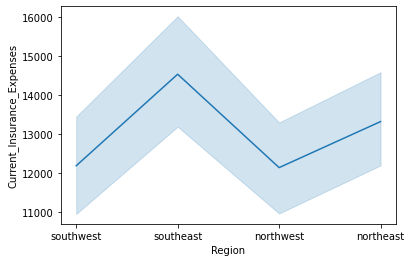

In [71]:
Y = data[["Current_Insurance_Expenses"]]
X = data[["Age","BMI","Children","Sex","Smoking Habits","Region"]]

xcat = []
xcon = []

for i in X.columns:
    if(X[i].dtypes == "object"):
        xcat.append(i)
    else:
        xcon.append(i)
        
from sklearn.preprocessing import StandardScaler
ss = StandardScaler ()
data_X1std = pd.DataFrame(ss.fit_transform(X[xcon]),columns=xcon)
data_X2std = pd.get_dummies(X[xcat])
data_XAstd = data_X1std.join(data_X2std)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data_XAstd,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
model = lr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_abs_err = mean_absolute_error(ytrain,tr_pred)
ts_abs_err = mean_absolute_error(ytest,ts_pred)

from sklearn.metrics import mean_squared_error
tr_sqr_err = mean_squared_error(ytrain,tr_pred)
ts_sqr_err = mean_squared_error(ytest,ts_pred)

print("MODEL 6 [Linear Regression] -----------> Current_Insurance_Expenses as Predicted Value(Y) and Predictors as",list(X.columns))
print("Training Mean Absolute Error ------>",round(tr_abs_err,3))
print("Testing Mean Absolute Error ------>",round(ts_abs_err,3))
print("Training Mean Squared Error ------>",round(tr_sqr_err,3))
print("Testing Mean Squared Error ------>",round(ts_sqr_err,3))
print("Model Status -----> OVERFIT i.e. Testing Error > Training Error - Less Bias More Variance")
sb.lineplot(data["Region"],data["Current_Insurance_Expenses"])

# ***14)Backward Elimination OLS Linear Regression model -***

In [72]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Current_Insurance_Expenses   R-squared:                       0.757
Model:                                    OLS   Adj. R-squared:                  0.755
Method:                         Least Squares   F-statistic:                     403.9
Date:                        Thu, 09 Feb 2023   Prob (F-statistic):          1.80e-312
Time:                                17:09:50   Log-Likelihood:                -10548.
No. Observations:                        1047   AIC:                         2.111e+04
Df Residuals:                            1038   BIC:                         2.116e+04
Df Model:                                   8                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8861.1829    100.368     88.287      0.000    8664.235    9058.131
Age                 3582.8534    180.900     19.806      0.000    3227.883    3937.824
BMI                 1884.2607    186.904     10.081      0.000    1517.508    2251.013
Children             588.6631    176.897      3.328      0.001     241.547     935.779
Sex_female          4564.7098    189.385     24.103      0.000    4193.089    4936.331
Sex_male            4296.4732    182.879     23.494      0.000    3937.619    4655.327
Smoking Habits_no  -7108.2441    199.700    -35.595      0.000   -7500.106   -6716.382
Smoking Habits_yes  1.597e+04    260.313     61.347      0.000    1.55e+04    1.65e+04
Region_northeast    2721.4727    317.052      8.584      0.000    2099.337    3343.608
Region_northwest    2156.9774    311.571      6.923      0.000    1545.596    2768.359
Region_southeast    2103.1534    316.193      6.651      0.000    1482.702    2723.604
Region_southwest    1879.5795    314.609      5.974      0.000    1262.237    2496.922
==============================================================================
Omnibus:                      211.397   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              427.271
Skew:                           1.157   Prob(JB):                     1.66e-93
Kurtosis:                       5.106   Cond. No.                     2.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.54e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# ***15) Decision Tree Regressor -***

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtr  =DecisionTreeRegressor(random_state=21)
model = dtr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_sqr_err = mean_squared_error(ytrain,tr_pred)
ts_sqr_err = mean_squared_error(ytest,ts_pred)

from sklearn.metrics import r2_score
tr_r2scr = r2_score(ytrain,tr_pred)
ts_r2scr = r2_score(ytest,ts_pred)

print("Model Type - DECISION TREE REGRESSOR")
print("Predicted Value(Y) - Current_Insurance_Expenses")
print("-----------------------------------------------")
print("Training Mean Squared Error ------>",round(tr_sqr_err,3))
print("Testing Mean Squared Error ------>",round(ts_sqr_err,3))
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_r2scr,4))
print("Testing Data Accuracy Score - ",round(ts_r2scr,4))
print("------------------------------------------------")

Model Type - DECISION TREE REGRESSOR
Predicted Value(Y) - Current_Insurance_Expenses
-----------------------------------------------
Training Mean Squared Error ------> 249605.029
Testing Mean Squared Error ------> 33779521.768
-----------------------------------------------
Training Data Accuracy Score -  0.9982
Testing Data Accuracy Score -  0.7675
------------------------------------------------


*1) Max_Depth-*

In [74]:
tr = []
ts = []
for i in range(2,100,1):
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(random_state=21,max_depth=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_sqr_err = mean_squared_error(ytrain,tr_pred)
    ts_sqr_err = mean_squared_error(ytest,ts_pred)
    tr.append(tr_sqr_err)
    ts.append(ts_sqr_err)

Text(0, 0.5, 'Mean Squared Error')

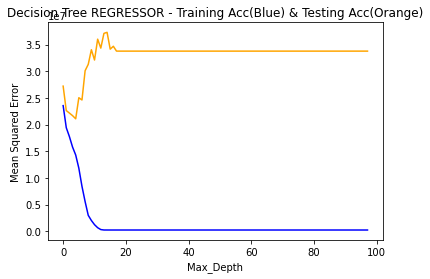

In [75]:
mlp.plot(tr,c="blue")
mlp.plot(ts,c="orange")
mlp.title("Decision Tree REGRESSOR - Training Acc(Blue) & Testing Acc(Orange)")
mlp.xlabel("Max_Depth")
mlp.ylabel("Mean Squared Error")

In [76]:
tr = []
ts = []
for i in range(2,100,1):
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(random_state=21,max_depth=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import r2_score
    tr_r2scr = r2_score(ytrain,tr_pred)
    ts_r2scr = r2_score(ytest,ts_pred)
    tr.append(tr_r2scr)
    ts.append(ts_r2scr)

Text(0, 0.5, 'R2 Score')

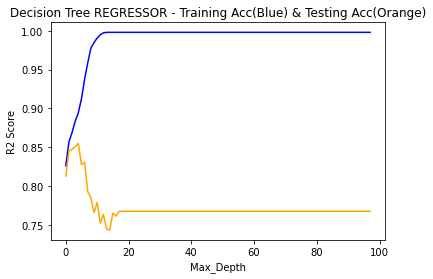

In [77]:
mlp.plot(tr,c="blue")
mlp.plot(ts,c="orange")
mlp.title("Decision Tree REGRESSOR - Training Acc(Blue) & Testing Acc(Orange)")
mlp.xlabel("Max_Depth")
mlp.ylabel("R2 Score")

*GridSearch CV for best params-(Max_depth)*

In [78]:
tg = {"max_depth":range(2,10,1),}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring="neg_mean_squared_error",cv=3)
cvmodel = cv.fit(data_XAstd,Y)
cvmodel.best_params_

{'max_depth': 3}

In [79]:
from sklearn.tree import DecisionTreeRegressor
dtr  =DecisionTreeRegressor(random_state=21,max_depth=3)
model = dtr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_sqr_err = mean_squared_error(ytrain,tr_pred)
ts_sqr_err = mean_squared_error(ytest,ts_pred)

print("Model Type - DECISION TREE REGRESSOR(Max_depth = 3)")
print("Predicted Value(Y) - Current_Insurance_Expenses")
print("-----------------------------------------------")
print("Training Mean Squared Error ------>",round(tr_sqr_err,3))
print("Testing Mean Squared Error ------>",round(ts_sqr_err,3))
print("------------------------------------------------")

Model Type - DECISION TREE REGRESSOR(Max_depth = 3)
Predicted Value(Y) - Current_Insurance_Expenses
-----------------------------------------------
Training Mean Squared Error ------> 19423164.245
Testing Mean Squared Error ------> 22635595.936
------------------------------------------------


In [80]:
from sklearn.tree import DecisionTreeRegressor
dtr  =DecisionTreeRegressor(random_state=21,max_depth=3)
model = dtr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import r2_score
tr_r2scr = r2_score(ytrain,tr_pred)
ts_r2scr = r2_score(ytest,ts_pred)

print("Model Type - DECISION TREE REGRESSOR (Max_depth = 3)")
print("Predicted Value(Y) - Current_Insurance_Expenses")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_r2scr,4))
print("Testing Data Accuracy Score - ",round(ts_r2scr,4))
print("------------------------------------------------")

Model Type - DECISION TREE REGRESSOR (Max_depth = 3)
Predicted Value(Y) - Current_Insurance_Expenses
-----------------------------------------------
Training Data Accuracy Score -  0.8568
Testing Data Accuracy Score -  0.8442
------------------------------------------------


*2)Min Samples Split-*

In [81]:
tr = []
ts = []
for i in range(2,250,1):
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(random_state=21,min_samples_split=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_sqr_err = mean_squared_error(ytrain,tr_pred)
    ts_sqr_err = mean_squared_error(ytest,ts_pred)
    tr.append(tr_sqr_err)
    ts.append(ts_sqr_err)

Text(0, 0.5, 'Mean Squared Error')

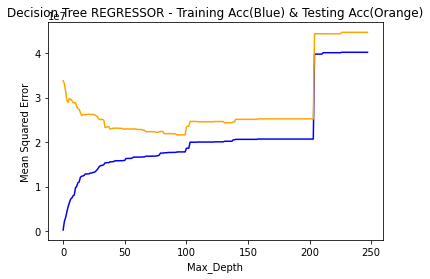

In [82]:
mlp.plot(tr,c="blue")
mlp.plot(ts,c="orange")
mlp.title("Decision Tree REGRESSOR - Training Acc(Blue) & Testing Acc(Orange)")
mlp.xlabel("Max_Depth")
mlp.ylabel("Mean Squared Error")

*GridSearch CV for best params-(Min Samples Split)*

In [83]:
tg = {"min_samples_split":range(2,250,1),}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring="neg_mean_squared_error",cv=3)
cvmodel = cv.fit(data_XAstd,Y)
cvmodel.best_params_

{'min_samples_split': 78}

In [84]:
from sklearn.tree import DecisionTreeRegressor
dtr  =DecisionTreeRegressor(random_state=21,min_samples_split=78)
model = dtr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_sqr_err = mean_squared_error(ytrain,tr_pred)
ts_sqr_err = mean_squared_error(ytest,ts_pred)

print("Model Type - DECISION TREE REGRESSOR(Min_Samples_Split = 73)")
print("Predicted Value(Y) - Current_Insurance_Expenses")
print("-----------------------------------------------")
print("Training Mean Squared Error ------>",round(tr_sqr_err,3))
print("Testing Mean Squared Error ------>",round(ts_sqr_err,3))
print("------------------------------------------------")

Model Type - DECISION TREE REGRESSOR(Min_Samples_Split = 73)
Predicted Value(Y) - Current_Insurance_Expenses
-----------------------------------------------
Training Mean Squared Error ------> 16923553.986
Testing Mean Squared Error ------> 22198802.697
------------------------------------------------


In [85]:
from sklearn.tree import DecisionTreeRegressor
dtr  =DecisionTreeRegressor(random_state=21,min_samples_split=78)
model = dtr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import r2_score
tr_r2scr = r2_score(ytrain,tr_pred)
ts_r2scr = r2_score(ytest,ts_pred)

print("Model Type - DECISION TREE REGRESSOR (Min_Samples_Split = 73)")
print("Predicted Value(Y) - Current_Insurance_Expenses")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_r2scr,4))
print("Testing Data Accuracy Score - ",round(ts_r2scr,4))
print("------------------------------------------------")

Model Type - DECISION TREE REGRESSOR (Min_Samples_Split = 73)
Predicted Value(Y) - Current_Insurance_Expenses
-----------------------------------------------
Training Data Accuracy Score -  0.8752
Testing Data Accuracy Score -  0.8472
------------------------------------------------


*3) Min Samples Leaf -*

In [86]:
tr = []
ts = []
for i in range(2,150,1):
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(random_state=21,min_samples_leaf=i)
    model = dtr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_sqr_err = mean_squared_error(ytrain,tr_pred)
    ts_sqr_err = mean_squared_error(ytest,ts_pred)
    tr.append(tr_sqr_err)
    ts.append(ts_sqr_err)

Text(0, 0.5, 'Mean Squared Error')

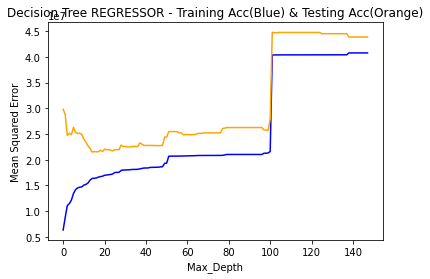

In [87]:
mlp.plot(tr,c="blue")
mlp.plot(ts,c="orange")
mlp.title("Decision Tree REGRESSOR - Training Acc(Blue) & Testing Acc(Orange)")
mlp.xlabel("Max_Depth")
mlp.ylabel("Mean Squared Error")

*GridSearch CV for best params-(Min Samples Leaf)*

In [88]:
tg = {"min_samples_leaf":range(2,150,1),}
dtr = DecisionTreeRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring="neg_mean_squared_error",cv=3)
cvmodel = cv.fit(data_XAstd,Y)
cvmodel.best_params_

{'min_samples_leaf': 38}

In [89]:
from sklearn.tree import DecisionTreeRegressor
dtr  =DecisionTreeRegressor(random_state=21,min_samples_leaf=38)
model = dtr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_sqr_err = mean_squared_error(ytrain,tr_pred)
ts_sqr_err = mean_squared_error(ytest,ts_pred)

print("Model Type - DECISION TREE REGRESSOR(Min_Samples_Leaf = 38)")
print("Predicted Value(Y) - Current_Insurance_Expenses")
print("-----------------------------------------------")
print("Training Mean Squared Error ------>",round(tr_sqr_err,3))
print("Testing Mean Squared Error ------>",round(ts_sqr_err,3))
print("------------------------------------------------")

Model Type - DECISION TREE REGRESSOR(Min_Samples_Leaf = 38)
Predicted Value(Y) - Current_Insurance_Expenses
-----------------------------------------------
Training Mean Squared Error ------> 18140030.751
Testing Mean Squared Error ------> 22578828.052
------------------------------------------------


In [90]:
from sklearn.tree import DecisionTreeRegressor
dtr  =DecisionTreeRegressor(random_state=21,min_samples_leaf=38)
model = dtr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import r2_score
tr_r2scr = r2_score(ytrain,tr_pred)
ts_r2scr = r2_score(ytest,ts_pred)

print("Model Type - DECISION TREE REGRESSOR (Min_Samples_Leaf = 38)")
print("Predicted Value(Y) - Current_Insurance_Expenses")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_r2scr,4))
print("Testing Data Accuracy Score - ",round(ts_r2scr,4))
print("------------------------------------------------")

Model Type - DECISION TREE REGRESSOR (Min_Samples_Leaf = 38)
Predicted Value(Y) - Current_Insurance_Expenses
-----------------------------------------------
Training Data Accuracy Score -  0.8662
Testing Data Accuracy Score -  0.8446
------------------------------------------------


In [91]:
DT_Scores = {"Pruning-Factors" : ["Max Depth","Minimum_Samples_Split","Minimum_Samples_Leaf"],
             "Values" : ["3","73","38"],
             "Mean_Squared_Training_Errors" : ["19423164.245","16923553.986","18140030.751"],
             "Mean_Squared_Testing_Errors" : ["22635595.936","22635595.936","22578828.052"],
             "Training_Accuracy_Score" : ["0.8568","0.8752","0.8662"],
             "Testing_Accuracy_Score" : ["0.8442","0.8472","0.8446"]   
}

In [92]:
DecisionTree_Results = pd.DataFrame(data=DT_Scores)

In [93]:
DecisionTree_Results

,Pruning-Factors,Values,Mean_Squared_Training_Errors,Mean_Squared_Testing_Errors,Training_Accuracy_Score,Testing_Accuracy_Score
0,Max Depth,3,19423164.245,22635595.936,0.8568,0.8442
1,Minimum_Samples_Split,73,16923553.986,22635595.936,0.8752,0.8472
2,Minimum_Samples_Leaf,38,18140030.751,22578828.052,0.8662,0.8446


In [94]:
from sklearn.tree import export_graphviz
export_graphviz(dtr,out_file="F:\Raw Datasets\Finance\Life Insurance.out")

# ***16) KNN Regressor-***

In [95]:
tr = []
ts = []
for i in range(2,50,1):
    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor(n_neighbors=i)
    model = knr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_sqr_err = mean_squared_error(ytrain,tr_pred)
    ts_sqr_err = mean_squared_error(ytest,ts_pred)
    tr.append(tr_sqr_err)
    ts.append(ts_sqr_err)

Text(0, 0.5, 'Mean Squared Error')

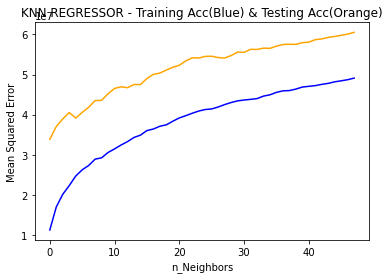

In [96]:
mlp.plot(tr,c="blue")
mlp.plot(ts,c="orange")
mlp.title("KNN REGRESSOR - Training Acc(Blue) & Testing Acc(Orange)")
mlp.xlabel("n_Neighbors")
mlp.ylabel("Mean Squared Error")

In [97]:
tr = []
ts = []
for i in range(2,50,1):
    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor(n_neighbors=i)
    model = knr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import r2_score
    tr_r2scr = r2_score(ytrain,tr_pred)
    ts_r2scr = r2_score(ytest,ts_pred)
    tr.append(tr_r2scr)
    ts.append(ts_r2scr)

Text(0, 0.5, 'Accuracy Score')

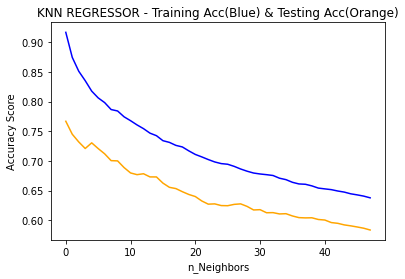

In [98]:
mlp.plot(tr,c="blue")
mlp.plot(ts,c="orange")
mlp.title("KNN REGRESSOR - Training Acc(Blue) & Testing Acc(Orange)")
mlp.xlabel("n_Neighbors")
mlp.ylabel("Accuracy Score")

*GridSearch CV for best params-(n_neighbors)*

In [99]:
tg = {"n_neighbors" : range(0,50,1)}

knr = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV (knr,tg,scoring="neg_mean_squared_error",cv=3)
cvmodel = cv.fit(data_XAstd,Y)
cvmodel.best_params_

{'n_neighbors': 4}

In [100]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=4)
model = knr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_sqr_err = mean_squared_error(ytrain,tr_pred)
ts_sqr_err = mean_squared_error(ytest,ts_pred)

from sklearn.metrics import r2_score
tr_r2scr = r2_score(ytrain,tr_pred)
ts_r2scr = r2_score(ytest,ts_pred)

print("Model Type - KNN REGRESSOR (n_neighbors = 4)")
print("Predicted Value(Y) - Current_Insurance_Expenses")
print("-----------------------------------------------")
print("Training Mean Squared Error ------>",round(tr_sqr_err,3))
print("Testing Mean Squared Error ------>",round(ts_sqr_err,3))
print("------------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_r2scr,4))
print("Testing Data Accuracy Score - ",round(ts_r2scr,4))
print("------------------------------------------------")

Model Type - KNN REGRESSOR (n_neighbors = 4)
Predicted Value(Y) - Current_Insurance_Expenses
-----------------------------------------------
Training Mean Squared Error ------> 20158453.444
Testing Mean Squared Error ------> 38941195.754
------------------------------------------------
Training Data Accuracy Score -  0.8513
Testing Data Accuracy Score -  0.732
------------------------------------------------


# ***17) Random Forest Regressor-***

In [101]:
tr = []
ts = []
for i in range(2,100,1):
    from sklearn.ensemble import RandomForestRegressor
    rfr = RandomForestRegressor(n_estimators=100,random_state=21,max_depth=i)
    model = rfr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_sqr_err = mean_squared_error(ytrain,tr_pred)
    ts_sqr_err = mean_squared_error(ytest,ts_pred)
    tr.append(tr_sqr_err)
    ts.append(tr_sqr_err)

Text(0, 0.5, 'Mean_Squared_Error')

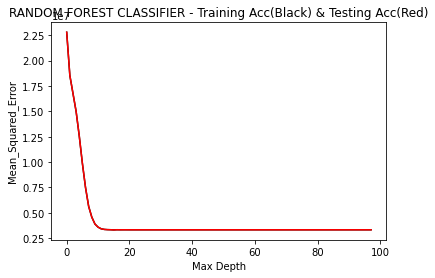

In [102]:
mlp.plot(tr,c="black")
mlp.plot(ts,c="red")
mlp.title("RANDOM FOREST CLASSIFIER - Training Acc(Black) & Testing Acc(Red)")
mlp.xlabel("Max Depth")
mlp.ylabel("Mean_Squared_Error")

In [103]:
tr = []
ts = []
for i in range(2,100,1):
    from sklearn.ensemble import RandomForestRegressor
    rfr = RandomForestRegressor(n_estimators=100,random_state=21,max_depth=i)
    model = rfr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    tr_r2scr = r2_score(ytrain,tr_pred)
    ts_r2scr = r2_score(ytest,ts_pred)
    tr.append(tr_r2scr)
    ts.append(ts_r2scr)

Text(0, 0.5, 'Accuracy SCore')

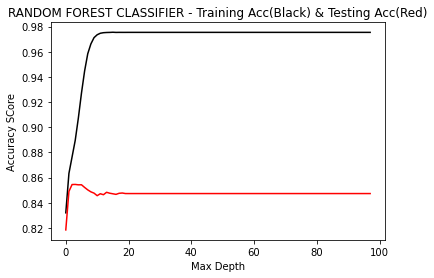

In [104]:
mlp.plot(tr,c="black")
mlp.plot(ts,c="red")
mlp.title("RANDOM FOREST CLASSIFIER - Training Acc(Black) & Testing Acc(Red)")
mlp.xlabel("Max Depth")
mlp.ylabel("Accuracy SCore")

*GridSearch CV for best params-*

In [105]:
tg = {"max_depth": range(0,50,1),
      "n_estimators" :[100,200]
     }
rfr = RandomForestRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfr,tg,scoring="neg_mean_squared_error",cv=3)
cvmodel = cv.fit(data_XAstd,Y)
cvmodel.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [106]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200,random_state=21,max_depth=5)
model = rfr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_sqr_err = mean_squared_error(ytrain,tr_pred)
ts_sqr_err = mean_squared_error(ytest,ts_pred)

from sklearn.metrics import r2_score
tr_r2scr = r2_score(ytrain,tr_pred)
ts_r2scr = r2_score(ytest,ts_pred)

print("Model Type - RANDOM FOREST REGRESSOR")
print("Predicted Value(Y) - Current_Insurance_Expenses")
print("-----------------------------------------------")
print("Training Mean Squared Error ------>",round(tr_sqr_err,3))
print("Testing Mean Squared Error ------>",round(ts_sqr_err,3))
print("------------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_r2scr,4))
print("Testing Data Accuracy Score - ",round(ts_r2scr,4))
print("------------------------------------------------")

Model Type - RANDOM FOREST REGRESSOR
Predicted Value(Y) - Current_Insurance_Expenses
-----------------------------------------------
Training Mean Squared Error ------> 14921357.261
Testing Mean Squared Error ------> 21137652.112
------------------------------------------------
Training Data Accuracy Score -  0.89
Testing Data Accuracy Score -  0.8545
------------------------------------------------


# ***18) Feature Importance of Parameters-***

In [107]:
rfr = RandomForestRegressor(n_estimators=200,random_state=21,max_depth=5)
rfr.fit(data_XAstd,Y)
rfr.feature_importances_

array([1.22181610e-01, 1.66248216e-01, 1.10659674e-02, 1.59097392e-04,
       1.72545708e-04, 2.99604751e-01, 3.96533270e-01, 2.06117025e-03,
       1.07572800e-03, 4.47612674e-04, 4.50032436e-04])

In [108]:
Important_Parameters = pd.DataFrame([data_XAstd.columns,rfr.feature_importances_]).T
Important_Parameters.columns = ["Key_Factors","Importance"]
Important_Parameters["Importance"] = Important_Parameters["Importance"].astype(float)
Important_Parameters.sort_values(by="Importance",ascending=False)

,Key_Factors,Importance
6,Smoking Habits_yes,0.396533
5,Smoking Habits_no,0.299605
1,BMI,0.166248
0,Age,0.122182
2,Children,0.011066
7,Region_northeast,0.002061
8,Region_northwest,0.001076
10,Region_southwest,0.000450
9,Region_southeast,0.000448
4,Sex_male,0.000173


# ***19) Overall Models Score Comparison-***

In [109]:
models= {
    "Models": ["KNN Regressor","Decision Tree Regressor","Random Forest Regressor"],
    "Training Accuracy Score": ["0.8513","0.8752","0.89"],
    "Testing Accuracy Score": ["0.732","0.8472","0.8545"]
}

In [110]:
Overall_Model_Comparison = pd.DataFrame(data=models)
Overall_Model_Comparison["Training Accuracy Score"] = Overall_Model_Comparison["Training Accuracy Score"].astype(float)
Overall_Model_Comparison["Testing Accuracy Score"] = Overall_Model_Comparison["Testing Accuracy Score"].astype(float)

In [111]:
Overall_Model_Comparison

,Models,Training Accuracy Score,Testing Accuracy Score
0,KNN Regressor,0.8513,0.7320
1,Decision Tree Regressor,0.8752,0.8472
2,Random Forest Regressor,0.8900,0.8545


Text(0.5, 1.0, 'Comparison of Training Accuracy Scores in various Models')

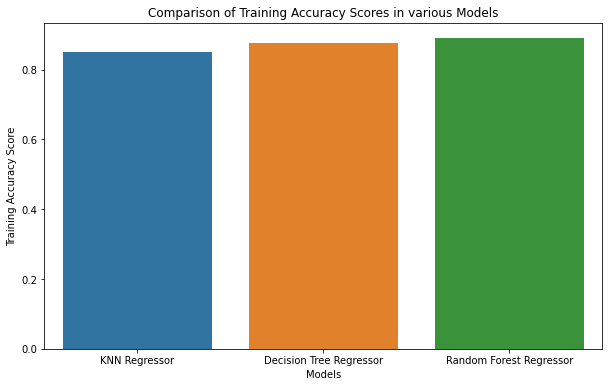

In [112]:
mlp.figure(figsize=(10,6))
sb.barplot(Overall_Model_Comparison["Models"],Overall_Model_Comparison["Training Accuracy Score"])
mlp.title("Comparison of Training Accuracy Scores in various Models")

Text(0.5, 1.0, 'Comparison of Testing Accuracy Scores in various Models')

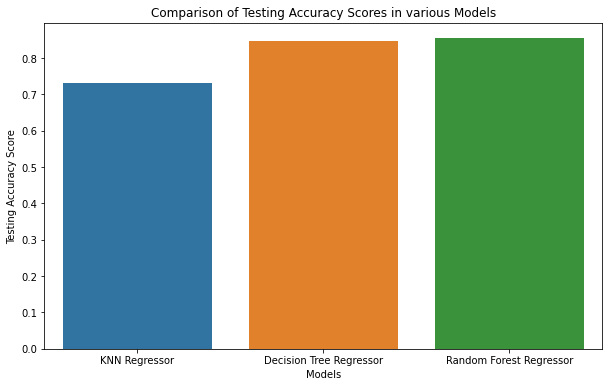

In [113]:
mlp.figure(figsize=(10,6))
sb.barplot(Overall_Model_Comparison["Models"],Overall_Model_Comparison["Testing Accuracy Score"])
mlp.title("Comparison of Testing Accuracy Scores in various Models")

# ***20) Overall Model Score for Test Unseen Data -***

In [114]:
model.score(xtest,ytest)
print("Overall Model Accuracy Score for Unseen Data",round(model.score(xtest,ytest),4))

Overall Model Accuracy Score for Unseen Data 0.8545


# ***21) Deploying the model to the existing official data to idenitfy Real and Predicted Insurance Expenses of Existing Customers -***

In [115]:
data_XAstd.head(2)

,Age,BMI,Children,Sex_female,Sex_male,Smoking Habits_no,Smoking Habits_yes,Region_northeast,Region_northwest,Region_southeast,Region_southwest
0,-1.439063,-0.449713,-0.929616,1,0,0,1,0,0,0,1
1,-1.510086,0.538052,-0.040093,0,1,1,0,0,0,1,0


In [116]:
data_XAstd_final = data_XAstd[xtrain.columns]

In [117]:
model.predict(data_XAstd_final)

array([17569.03300599,  3664.22139326,  5744.62265819, ...,
        3092.63080753,  2741.01563242, 28115.40543871])

In [118]:
Final_Prediction_Model = pd.DataFrame(data[["Age","Sex","BMI","Smoking Habits","Children","Region","Current_Insurance_Expenses"]])
Final_Prediction_Model['Predicted_Insurance_Expenses'] = model.predict(data_XAstd_final)

In [119]:
Final_Prediction_Model

,Age,Sex,BMI,Smoking Habits,Children,Region,Current_Insurance_Expenses,Predicted_Insurance_Expenses
0,19,female,27.9,yes,0,southwest,16884.92,17569.033006
1,18,male,33.8,no,1,southeast,1725.55,3664.221393
2,28,male,33.0,no,3,southeast,4449.46,5744.622658
3,33,male,22.7,no,0,northwest,21984.47,5190.248807
4,32,male,28.9,no,0,northwest,3866.86,4851.611075
...,...,...,...,...,...,...,...,...
1304,50,male,31.0,no,3,northwest,10600.55,11224.251793
1305,18,female,31.9,no,0,northeast,2205.98,3364.690365
1306,18,female,36.9,no,0,southeast,1629.83,3092.630808
1307,21,female,25.8,no,0,southwest,2007.95,2741.015632


# ***22) Comparison of both Actual and Predicted Insurance Expenses using Data Visualization-***

Text(0.5, 1.0, 'Final Model Visualization - Age Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta)')

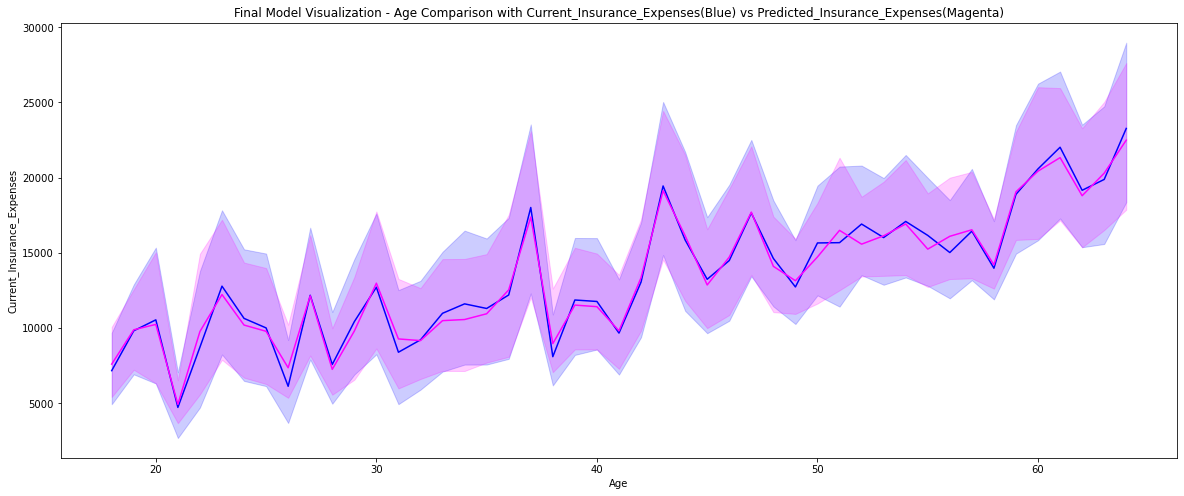

In [120]:
mlp.figure(figsize=(20,8))
pr = sb.lineplot(data=Final_Prediction_Model, x="Age", y="Current_Insurance_Expenses",color = "blue")
ac = sb.lineplot(data=Final_Prediction_Model, x="Age", y="Predicted_Insurance_Expenses",color = "magenta")
mlp.title("Final Model Visualization - Age Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta)")

Text(0.5, 1.0, 'Final Model Visualization - Sex Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta)')

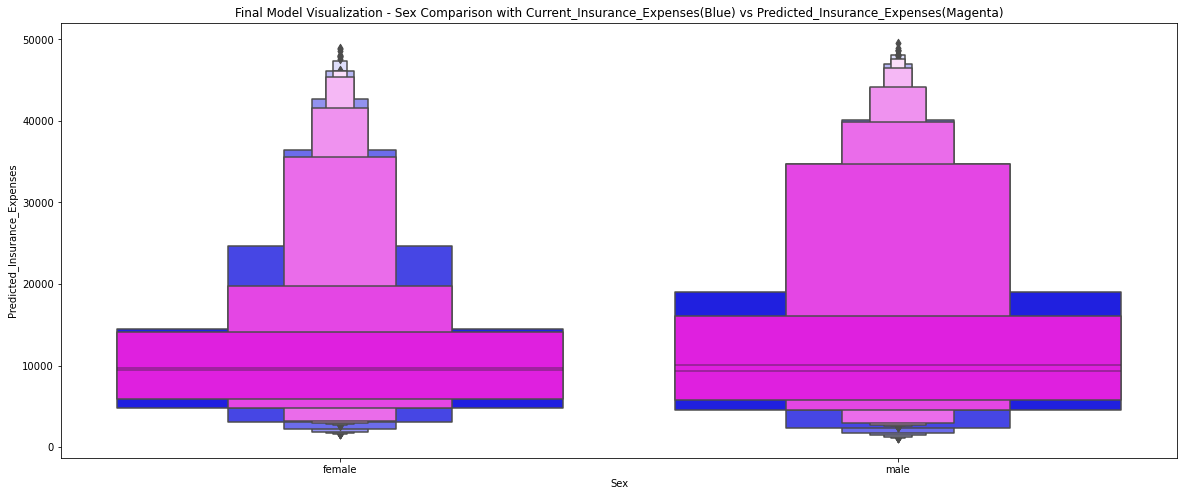

In [121]:
mlp.figure(figsize=(20,8))
pr = sb.boxenplot(data=Final_Prediction_Model, x="Sex", y="Current_Insurance_Expenses",color = "blue")
ac = sb.boxenplot(data=Final_Prediction_Model, x="Sex", y="Predicted_Insurance_Expenses",color = "magenta")
mlp.title("Final Model Visualization - Sex Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta)")

Text(0.5, 1.0, 'Final Model Visualization - BMI Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta) ')

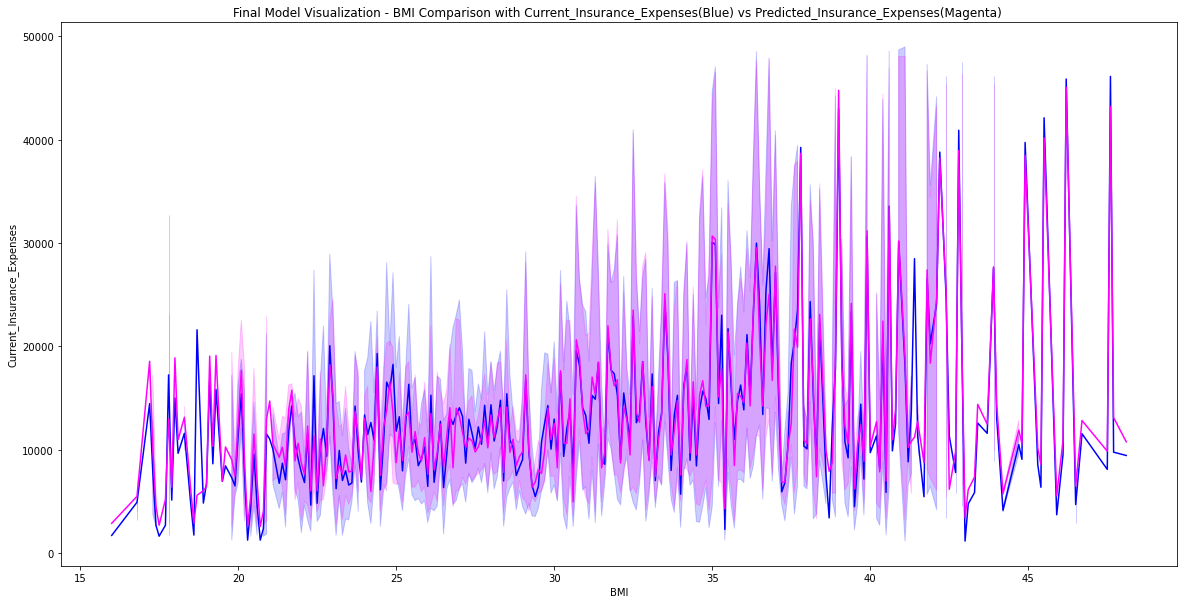

In [122]:
mlp.figure(figsize=(20,10))
pr = sb.lineplot(data=Final_Prediction_Model, x="BMI", y="Current_Insurance_Expenses",color = "blue")
ac = sb.lineplot(data=Final_Prediction_Model, x="BMI", y="Predicted_Insurance_Expenses",color = "magenta")
mlp.title("Final Model Visualization - BMI Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta) ")

Text(0.5, 1.0, 'Final Model Visualization - Smoking Habits Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta) ')

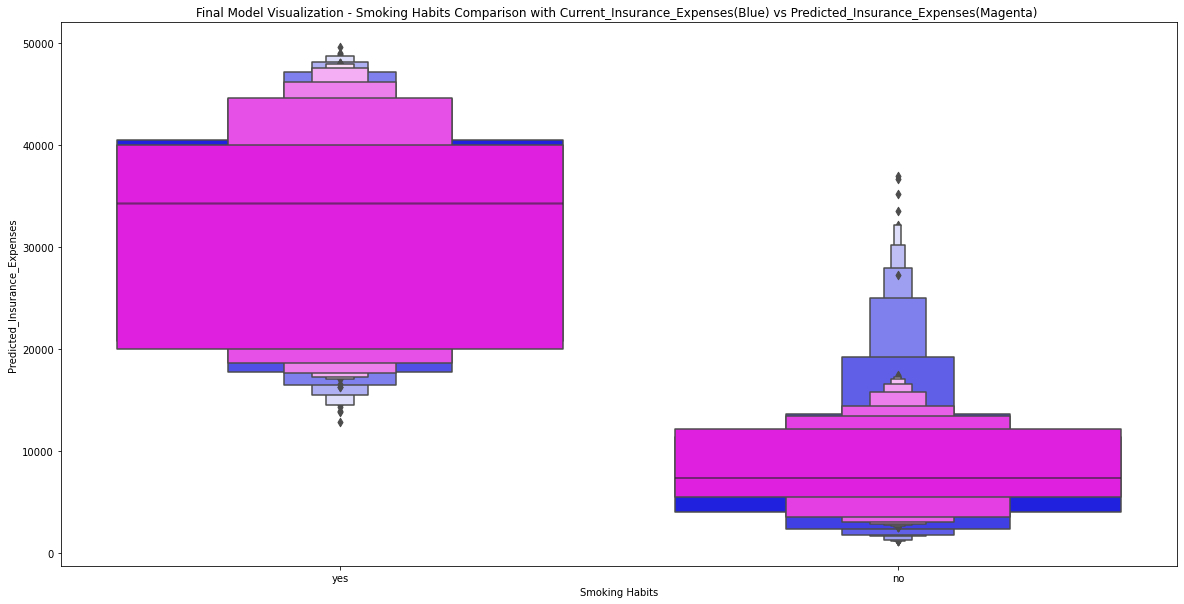

In [123]:
mlp.figure(figsize=(20,10))
pr = sb.boxenplot(data=Final_Prediction_Model, x="Smoking Habits", y="Current_Insurance_Expenses",color = "blue")
ac = sb.boxenplot(data=Final_Prediction_Model, x="Smoking Habits", y="Predicted_Insurance_Expenses",color = "magenta")
mlp.title("Final Model Visualization - Smoking Habits Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta) ")

Text(0.5, 1.0, 'Final Model Visualization - Children Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta) ')

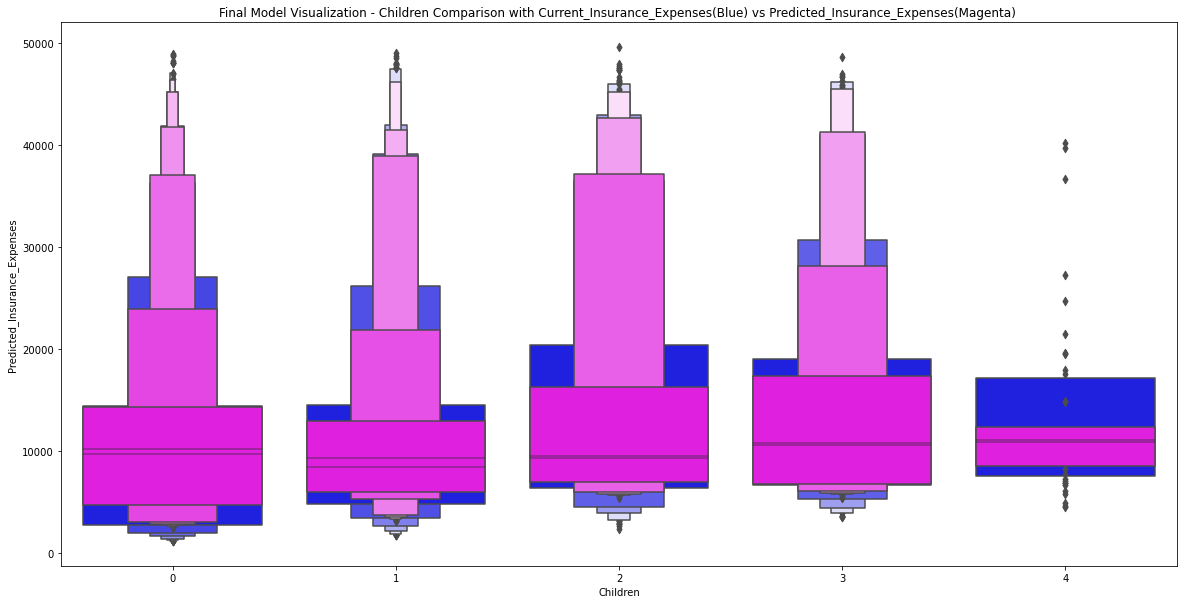

In [124]:
mlp.figure(figsize=(20,10))
pr = sb.boxenplot(data=Final_Prediction_Model, x="Children", y="Current_Insurance_Expenses",color = "blue")
ac = sb.boxenplot(data=Final_Prediction_Model, x="Children", y="Predicted_Insurance_Expenses",color = "magenta")
mlp.title("Final Model Visualization - Children Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta) ")

Text(0.5, 1.0, 'Final Model Visualization - Region Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta) ')

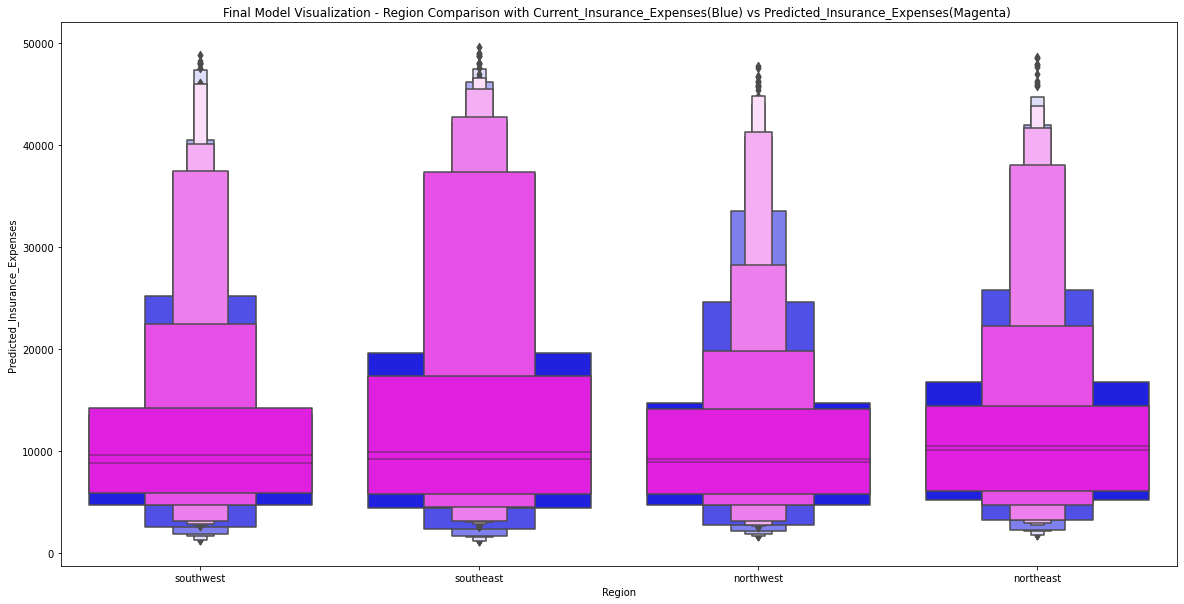

In [125]:
mlp.figure(figsize=(20,10))
pr = sb.boxenplot(data=Final_Prediction_Model, x="Region", y="Current_Insurance_Expenses",color = "blue")
ac = sb.boxenplot(data=Final_Prediction_Model, x="Region", y="Predicted_Insurance_Expenses",color = "magenta")
mlp.title("Final Model Visualization - Region Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta) ")

Text(0.5, 1.0, 'Final Model Visualization - Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta) ')

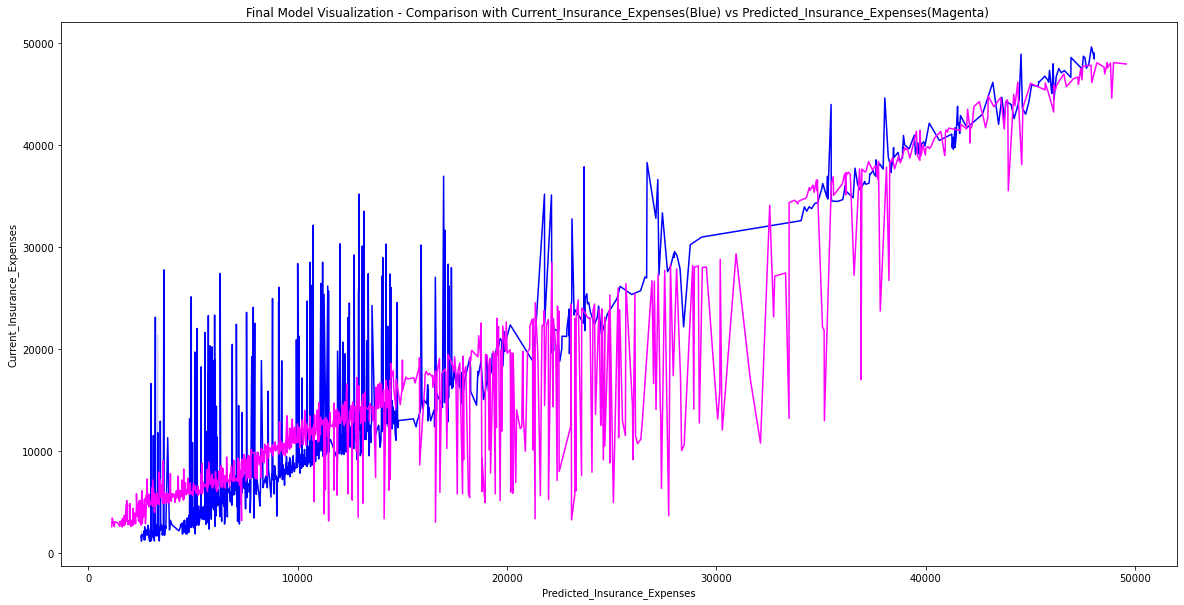

In [126]:
mlp.figure(figsize=(20,10))
pr = sb.lineplot(data=Final_Prediction_Model, x="Predicted_Insurance_Expenses", y="Current_Insurance_Expenses",color = "blue")
ac = sb.lineplot(data=Final_Prediction_Model, x="Current_Insurance_Expenses", y="Predicted_Insurance_Expenses",color = "magenta")
mlp.title("Final Model Visualization - Comparison with Current_Insurance_Expenses(Blue) vs Predicted_Insurance_Expenses(Magenta) ")